In [9]:
from numpy import *
import operator

def createDataSet():
  group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
  labels = ['A','A','B','B']
  return group, labels

In [10]:
import KNN

In [11]:
group,labels = KNN.createDataSet()

In [12]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [13]:
labels

['A', 'A', 'B', 'B']

In [17]:
def classify0(inX, dataSet, labels, k):
  dataSetSize = dataSet.shape[0]
  diffMat = tile(inX, (dataSetSize,1))- dataSet
  sqDiffMat = diffMat**2
  sqDistances = sqDiffMat.sum(axis=1)
  distances = sqDistances**0.5
  sortedDistIndicies = distances.argsort()
  classCount={}
  for i in range(k):
      voteIlabel = labels[sortedDistIndicies[i]]
      classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
      sortedClassCount = sorted(classCount.iteritems(),
                                key=operator.itemgetter(1), reverse=True)
      return sortedClassCount[0][0]

In [18]:
KNN.classify0([0,0], group, labels, 3)

[1.48660687 1.41421356 0.         0.1       ]
[2 3 1 0]
2
3
1


'B'

In [19]:
def file2matrix(filename):
  fr = open(filename)
  numberOfLines = len(fr.readlines())
  returnMat = zeros((numberOfLines,3))
  classLabelVector = []
  fr = open(filename)
  index = 0
  for line in fr.readlines():
    line = line.strip()
    listFromLine = line.split('\t')
    returnMat[index,:] = listFromLine[0:3]
    classLabelVector.append(int(listFromLine[-1]))
    index += 1
  return returnMat,classLabelVector

In [20]:
reload(KNN)

<module 'KNN' from 'C:\ProgramData\Anaconda2\lib\site-packages\KNN.pyc'>

In [21]:
datingDataMat, datingLabels = KNN.file2matrix('C:/Users/Timothy Lam/Documents/London South Bank University/PhD Computer Science and Informatics/Machine Learning/datingTestSet2.txt')

In [22]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [24]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

In [25]:
import matplotlib
import matplotlib.pyplot as plt

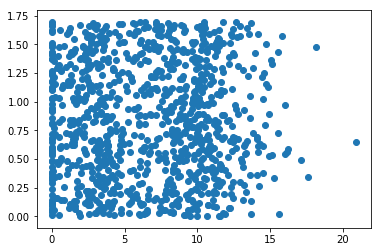

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2])
plt.show()

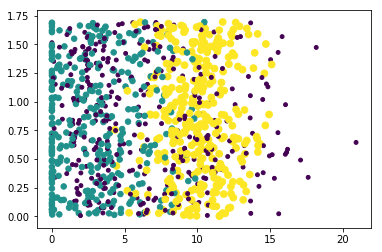

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0*array(datingLabels), 15.0*array(datingLabels))
plt.show()

In [32]:
def autoNorm(dataSet):
  minVals = dataSet.min(0)
  maxVals = dataSet.max(0)
  ranges = maxVals - minVals
  normDataSet = zeros(shape(dataSet))
  m = dataSet.shape[0]
  normDataSet = dataSet - tile(minVals, (m,1))
  normDataSet = normDataSet/tile(ranges, (m,1))
  return normDataSet, ranges, minVals

In [33]:
reload(KNN)

<module 'KNN' from 'C:\ProgramData\Anaconda2\lib\site-packages\KNN.pyc'>

In [34]:
normMat, ranges, minVals = KNN.autoNorm(datingDataMat)

In [35]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [36]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [37]:
minVals

array([0.      , 0.      , 0.001156])

In [38]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat,datingLabels = file2matrix('C:/Users/Timothy Lam/Documents/London South Bank University/PhD Computer Science and Informatics/Machine Learning/datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],
                                     datingLabels[numTestVecs:m],3)
        print ("the classifier came back with: %d, the real answer is: %d"\
               % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print ("the total error rate is: %f" % (errorCount/float(numTestVecs)))

In [39]:
KNN.datingClassTest()

[0.26870805 0.4135396  0.27828238 0.62872859 0.5709495  0.61957421
 0.51460302 0.64502323 0.63452557 0.40705837 0.53630368 0.43682525
 0.47970332 0.35580267 0.57152814 0.43440345 0.34408584 0.5985777
 0.26708636 0.47249004 0.34585181 0.20924139 0.53941494 0.30127216
 0.53070202 0.4556236  0.55754586 0.59159266 0.49529827 0.38354067
 0.68372562 0.6624371  0.58701604 0.47792515 0.21379503 0.62657373
 0.4386369  0.58830906 0.11543047 0.65606665 0.7019036  0.55020598
 0.50214767 0.34495829 0.52667417 0.26514146 0.53065565 0.1592728
 0.53894418 0.23939614 0.31079628 0.23524839 0.44359985 0.17451074
 0.47118082 0.61798791 0.51615148 0.48667837 0.17563755 0.53699393
 0.61483851 0.49122393 0.36082093 0.47047099 0.43838744 0.46528106
 0.18075745 0.41653799 0.31912787 0.38135425 0.22788945 0.61147652
 0.60719929 0.52923716 0.24890594 0.44314131 0.35604625 0.39170035
 0.47042408 0.37993872 0.46922868 0.55642359 0.463533   0.15663946
 0.1811047  0.15692217 0.38218893 0.76561769 0.283853   0.355172

[0.75591733 0.87954882 0.5323155  0.67426747 1.04592094 1.03651225
 0.97005566 1.10512008 0.94417247 0.82883934 0.71833141 0.8805686
 0.92145367 0.82139888 0.66448402 0.37342568 0.42461721 0.83282771
 0.64463912 0.35492454 0.34389811 0.32515878 0.98228386 0.51101173
 0.57861586 0.60635378 0.96624633 0.97919576 0.69452056 0.76549608
 1.10561896 1.10902109 0.99112371 0.87415195 0.47086849 0.61777698
 0.50859897 1.04806584 0.54984091 1.13464578 0.74390027 0.79800083
 0.43823703 0.4332647  0.9875912  0.3307788  0.20004799 0.62656057
 0.97879807 0.57286708 0.73585604 0.63917479 0.67067744 0.5686195
 0.49288617 1.03755404 0.8265593  0.67780164 0.43656357 0.37214288
 0.80791575 0.69403662 0.76777584 0.82449913 0.60528669 0.75991259
 0.54736202 0.64913802 0.29837377 0.25438126 0.53194281 1.08034294
 0.67649066 0.76685491 0.65869921 0.8733134  0.62235    0.87475809
 0.48605927 0.38803789 0.90224429 0.98996652 0.91522276 0.6087884
 0.56800637 0.60445003 0.14062326 1.2105975  0.70608073 0.7586825

[0.18395059 0.15147745 0.39990653 0.64553797 0.28879285 0.32395482
 0.43145013 0.352161   0.72149264 0.43743209 0.46830988 0.39750684
 0.23000387 0.32627977 0.60115847 0.58587906 0.46616559 0.4672266
 0.39210899 0.63826551 0.55457241 0.5183551  0.44952813 0.50872892
 0.57607844 0.6575236  0.27143388 0.31245379 0.68599095 0.19263771
 0.37921726 0.38750683 0.29873883 0.21319806 0.4326552  0.66522518
 0.50451393 0.49391487 0.3304333  0.37148024 0.69429337 0.41760955
 0.71583256 0.4566762  0.24071276 0.53201794 0.80019399 0.18333595
 0.24367114 0.44558538 0.13297121 0.33959246 0.40688311 0.33363039
 0.65587568 0.32478224 0.32956509 0.66946837 0.43330376 0.69027867
 0.51830785 0.69560596 0.43408599 0.5722528  0.42514552 0.59249936
 0.41416342 0.58450145 0.52057321 0.6592176  0.41291376 0.31204426
 0.62259412 0.64416003 0.21978694 0.31941143 0.30983864 0.27014859
 0.56089209 0.61029697 0.28124464 0.32513514 0.41870848 0.17142703
 0.30715593 0.29932219 0.65409751 0.46987339 0.37799626 0.26774

[0.6454918  0.67144692 0.3772612  0.43455657 0.81169222 0.67916084
 0.88014298 0.80789394 1.01065566 0.81478948 0.35151149 0.80555851
 0.69838166 0.77694066 0.5184724  0.2694846  0.11701111 0.46645394
 0.69039402 0.17469346 0.42945401 0.51050562 0.86729493 0.54271214
 0.33958654 0.71275078 0.60989883 0.60912722 0.83204462 0.4913414
 0.75005567 0.79868298 0.62689234 0.52287493 0.54895454 0.31971665
 0.22983649 0.97196249 0.5446059  0.88654057 0.45685528 0.41735144
 0.6541565  0.13432226 0.70994571 0.42215151 0.49634785 0.51413764
 0.69733717 0.67939153 0.52289244 0.64738807 0.43288686 0.57780053
 0.64584907 0.6830678  0.43816358 0.78294404 0.53177723 0.19068651
 0.46585243 0.8710042  0.81224004 0.89690035 0.17407719 0.81155379
 0.62488488 0.70337733 0.24037142 0.55395643 0.59337445 0.80700627
 0.4643662  0.77295281 0.52938388 0.67449994 0.29857391 0.77154171
 0.28253232 0.57873007 0.64876675 0.70103031 0.85951034 0.4397071
 0.53669618 0.59766526 0.39247689 0.87494683 0.73570763 0.533674

[445 235 425 495 291 144 345 482 116 356 125 491  48 486  27 274 112 404
 463  32 335 478 250 301  33  26 460 257 341 242 138 468 265 428 374 494
 282 357   5 442  30 347 118 403 171 197 247  55 465 244 278  29 350  12
 113 239 104 162 492 234 483   1 389  56 423 187 488  71 221  44 286  50
 157 435 156   4 378 364 212 264 379 178 394 170 455 202 137 233 290   7
 449 287 211 440 489 338 267 217 479 141 377 121 393 130 480 352  39 111
 205 309 431 219 238 446  41 206  31 182 179 481 343 413 200  87 484 279
  76 358  81 303 126 397 168  74  17 304 418 325 251 348  80 240 109 307
  83 152 188 312  47 493 101 299   0 362 223 259 438 450 398 215 469 380
  52 456 330 336 429 142  10 266 140  89  77  60 474 308 464 401 160 365
 340 275 409 209 271  90 185 285  64 400 331 105 487  75 131 490 323 384
 360  95 454 388 207 132 396 382 143 243 158 159  84 426 231 497 263 368
  91 316 268 432 385 430 124 210 300  85 175  13 485  94 339 320 280  53
  51 237 103 115 415 349 342 305 277 100 192 329 18

[109 308 137 413  83 142 178 105 348 223 380 300 438 469 365 435 370 432
 448  89   2 449 160 119  47 162  76 192 208 440 228 231 257 323 489  94
 211 400  50 280 468 305 480 415 277 207  33 171 279  29 168  16 126 247
 191 454 274  64 242 374  38  43 238 430 268 259 275  74 251 266 101 495
 498 156 241  98 221 291 442   0 166 294 425 116 434 467 157 494 345 307
 362 331 250  80 474 354 121 148  56 180  84 341 282 256 131 175  85 138
 310 140 389 129 478 219 159 185 186 388  75 201 210 428 382 261 209 404
 187 149 492 497 390   1 445  26 340 118 338 330 321 217 130  53 342 272
 460 439 197 357 290 356  68 371 483 499 239 409 304 320 128 491 383  45
 244 455 393 301 114 349 145 486  44 465 350 426  23  32 235  36  81 232
 202 262 386  66 482 124  58  41  27 278  52 236 336 384 429  51 471 173
 144 358 216 252 233 204 253  90  10 188 316  34 431 473 158 339 177 433
  12 456  48 264  55 296 111 227 143  21   5 394 450 170  70 112 401 452
  77 125 396 240 334 466 169 360 155 181 220 319 33

[0.66629505 0.76102114 0.59392766 0.54257196 0.93360345 0.96857348
 0.92810533 1.03646979 0.96900222 0.79600113 0.62043068 0.85133747
 0.78142538 0.72659891 0.47675052 0.30265443 0.44907614 0.71756178
 0.49764456 0.47016533 0.1553189  0.30327456 0.96245431 0.59257531
 0.46250225 0.71102662 0.90150106 0.89394216 0.7602493  0.64593706
 1.02099579 1.06269184 0.92050528 0.8098808  0.30793685 0.54836724
 0.43002263 0.98665874 0.51646107 1.03300271 0.63082344 0.69751292
 0.18504999 0.42190024 0.92311807 0.42682317 0.44404724 0.52374941
 0.86062842 0.45804588 0.61423676 0.49446778 0.51711738 0.43134809
 0.23780369 0.97534369 0.74173746 0.76355268 0.30556807 0.44805607
 0.68282903 0.72818361 0.65472648 0.80139992 0.57590767 0.80335582
 0.50095855 0.72655778 0.2936013  0.09888641 0.36610157 0.98694749
 0.52345716 0.85825606 0.51556804 0.86916957 0.53774333 0.77676968
 0.3881057  0.15119933 0.88644474 0.96623735 0.86359317 0.5557036
 0.42249913 0.49813358 0.30111524 1.14836185 0.60151036 0.76357

[0.30536834 0.1638884  0.49610319 0.57974714 0.27938055 0.26275524
 0.5483359  0.34746688 0.85777551 0.57060374 0.38837221 0.52639525
 0.17348741 0.43827672 0.54412942 0.58792141 0.49457864 0.35753916
 0.47422428 0.67323393 0.58178668 0.61119999 0.56616632 0.62984752
 0.52949911 0.78719103 0.21169719 0.20359266 0.82224167 0.10477565
 0.29864555 0.39650853 0.22245615 0.15494714 0.49559018 0.61431095
 0.47979207 0.5989184  0.4545658  0.36516296 0.61728622 0.31600616
 0.74310148 0.472167   0.264954   0.62905254 0.87717158 0.27663624
 0.15557931 0.54442236 0.12993977 0.41889145 0.34293149 0.41254581
 0.67604333 0.27592959 0.22568406 0.80402906 0.50911182 0.70354833
 0.41656662 0.83007498 0.53834823 0.70555727 0.39844841 0.73060875
 0.53525302 0.71745951 0.55762657 0.71858818 0.47755429 0.29458508
 0.55682567 0.77499389 0.25160488 0.42861363 0.27541383 0.37027983
 0.53707004 0.65158323 0.36453376 0.37469704 0.5409588  0.27949325
 0.36957653 0.40246434 0.72341978 0.44210891 0.4878047  0.3737

[0.62857343 0.53569549 0.67311425 0.18955468 0.66492812 0.60197898
 0.92720831 0.74508622 1.17196391 0.89756858 0.14505873 0.8855769
 0.48732514 0.75317365 0.19864091 0.38849384 0.46317776 0.15560041
 0.63379931 0.60174411 0.4548355  0.67448151 0.95102272 0.81910973
 0.20690403 0.99552741 0.55034996 0.47328788 1.05771785 0.31971263
 0.61794836 0.78752169 0.54278805 0.48020452 0.53494688 0.29194633
 0.26712607 0.97832948 0.66900107 0.75575025 0.22478241 0.18869956
 0.59732833 0.40211033 0.67513039 0.71698553 0.85483253 0.49938337
 0.51042828 0.69484129 0.39648045 0.58580908 0.12841964 0.54810832
 0.53977159 0.62375183 0.2993622  1.03887095 0.56817521 0.54777187
 0.09821172 1.05392176 0.78282149 0.99746258 0.33129798 1.01233139
 0.72960767 0.9580087  0.47946903 0.65155959 0.54829667 0.69053613
 0.16513891 1.04567707 0.41137587 0.79715114 0.26120668 0.72142098
 0.28192807 0.56363536 0.74176252 0.7607323  0.89853306 0.52088238
 0.48312317 0.60242448 0.69230061 0.80812757 0.72736541 0.69428

[0.56521407 0.64127926 0.60822604 0.5139223  0.81149564 0.88401422
 0.84492059 0.94088295 0.9341357  0.72608357 0.57488076 0.77984262
 0.65095854 0.61802488 0.40080452 0.34916378 0.48515656 0.64848298
 0.36984253 0.56308471 0.14613693 0.31855209 0.89237059 0.61510618
 0.44522633 0.74122807 0.82207803 0.80739138 0.7652832  0.54580516
 0.92518896 0.98070375 0.83823065 0.73596621 0.19477694 0.563027
 0.42819433 0.88929004 0.46965993 0.91447065 0.6098003  0.63452816
 0.12459716 0.44562837 0.83292026 0.48202803 0.58286406 0.42798638
 0.74440738 0.36348294 0.50559593 0.36704056 0.4284003  0.31684114
 0.10169625 0.89313388 0.67410127 0.77876905 0.22574045 0.54496256
 0.61785464 0.71918832 0.54155709 0.74251013 0.56921429 0.78624805
 0.44916869 0.7360743  0.3516256  0.18483822 0.23751124 0.87681569
 0.47671593 0.86857748 0.39470987 0.81583064 0.48609906 0.66352961
 0.39356228 0.0412114  0.82736581 0.90054357 0.77709935 0.49538967
 0.30418084 0.39929673 0.42012162 1.05688995 0.49601788 0.724816

[0.49352671 0.48449321 0.61952448 0.3730784  0.6471849  0.70778782
 0.80439637 0.78528791 0.99338976 0.73204078 0.39788649 0.75630552
 0.46176454 0.57720717 0.23066492 0.35862313 0.47259492 0.43741397
 0.37630473 0.60678648 0.25656155 0.46208306 0.8518446  0.68982341
 0.32950197 0.84354693 0.65191835 0.61252503 0.87134635 0.35527912
 0.73268534 0.83757257 0.65887698 0.57302585 0.26632168 0.46776766
 0.34276505 0.84253959 0.49954202 0.75276577 0.46365089 0.43615171
 0.33087762 0.41593464 0.69197971 0.58453217 0.74020629 0.35436799
 0.55069134 0.43475957 0.34398735 0.34521269 0.21562709 0.31106128
 0.25438713 0.72297143 0.48409494 0.87587482 0.31821717 0.57780692
 0.4103053  0.83736493 0.54940182 0.79436854 0.46341814 0.85010878
 0.517294   0.81291878 0.40263135 0.41383962 0.27375277 0.71080074
 0.32045364 0.92780923 0.26052408 0.75438689 0.34123904 0.5845136
 0.32695885 0.28908507 0.73661113 0.78686291 0.75005291 0.43503428
 0.25882337 0.39288673 0.56336377 0.88900322 0.50318689 0.66694

[0.29104623 0.45344959 0.53971633 1.03789463 0.48418121 0.64903591
 0.10058486 0.5356141  0.32796054 0.08274813 0.89239811 0.0838035
 0.55207408 0.20829096 0.96406253 0.89277852 0.76037093 0.90449179
 0.44334837 0.8857085  0.79290602 0.58911369 0.1728892  0.48072474
 0.95381401 0.50653552 0.62711223 0.70726123 0.43640683 0.62118394
 0.69753699 0.5483551  0.66032721 0.6100073  0.5864126  1.0507933
 0.86812248 0.15672521 0.36406949 0.50922295 1.10206422 0.85506658
 0.89192215 0.77406734 0.45904896 0.61401566 0.89475042 0.43240872
 0.58927538 0.43868292 0.52804657 0.44143531 0.80181515 0.47456826
 0.84892205 0.63426895 0.76680333 0.45718662 0.56274638 0.9753947
 0.94894775 0.42970312 0.30530765 0.21098728 0.80843918 0.31483348
 0.36875329 0.41771837 0.77579248 0.78801124 0.55115013 0.52008052
 1.00930858 0.45001613 0.52567899 0.32215908 0.7136271  0.24071401
 0.91179564 0.77738683 0.39999114 0.4701269  0.03896922 0.43861037
 0.51374816 0.38716437 0.79541611 0.66065619 0.30394263 0.4044504

[0.43859255 0.3326397  0.69749447 0.97268029 0.19295889 0.27940762
 0.42228638 0.09445932 0.79894497 0.55798661 0.76725738 0.46649595
 0.37627109 0.48716235 0.93363856 0.96549152 0.82491897 0.71547215
 0.68615763 0.98934176 0.93986031 0.8754828  0.42091464 0.78631152
 0.92418887 0.8881177  0.31695245 0.38643745 0.88545576 0.49938971
 0.27812183 0.16506921 0.32749919 0.37978735 0.79325815 0.99929724
 0.86514548 0.43738854 0.64526044 0.11297996 1.00163275 0.67738501
 1.08296605 0.82337533 0.1704615  0.87210053 1.15203179 0.5476658
 0.30375173 0.74968099 0.47769952 0.64817399 0.73680189 0.67514612
 1.01505779 0.26667108 0.5619564  0.87127302 0.79537868 1.05066685
 0.78627744 0.90398522 0.63856006 0.70934132 0.74925265 0.75093728
 0.71303199 0.79557704 0.90248461 1.0356372  0.75811543 0.11650764
 0.95028916 0.79738329 0.57306312 0.38486845 0.65727854 0.38776767
 0.9268258  0.98118264 0.32387703 0.26218597 0.47012401 0.53677773
 0.6641562  0.62076224 1.02359866 0.18825838 0.62078429 0.45853

[0.56929895 0.46270711 0.60607349 0.28993933 0.58026679 0.4808228
 0.85045727 0.63409493 1.11247263 0.83726387 0.09888345 0.81177421
 0.42278877 0.70417542 0.31834914 0.42793403 0.4298664  0.06848396
 0.62842703 0.58432605 0.50274784 0.67278016 0.86520219 0.7688894
 0.27684043 0.94682279 0.42836399 0.35264291 1.01318745 0.23983021
 0.50252033 0.67012734 0.42045563 0.36007635 0.5507601  0.33896077
 0.28540385 0.90693912 0.6269176  0.66364113 0.30541767 0.06496837
 0.67215112 0.37946661 0.56760751 0.68971943 0.85390928 0.45590831
 0.41993104 0.68900777 0.33436653 0.57497456 0.16366498 0.53927149
 0.61383413 0.50207239 0.17050214 0.98796568 0.5755459  0.55385501
 0.10015182 1.02035775 0.75815076 0.95090515 0.2665091  0.95372781
 0.70185923 0.90167345 0.48409382 0.69211034 0.56003799 0.59091241
 0.28174704 0.97609508 0.38442795 0.6990687  0.19449166 0.6606055
 0.33069607 0.61724799 0.63472969 0.64580016 0.83188686 0.45613278
 0.47533781 0.5760844  0.69642507 0.69047794 0.69964782 0.5985119

 255  60 353 189  93  14 230 194  35  72 453 161   3  40]
97
65
355
the classifier came back with: 1, the real answer is: 1
[0.01489912 0.21351438 0.43710599 0.76979259 0.32896889 0.47985858
 0.30091472 0.4358622  0.57107462 0.27417667 0.62821804 0.26474662
 0.3085383  0.13491045 0.69344982 0.66549599 0.563267   0.6361914
 0.27216821 0.71857355 0.57693359 0.46615384 0.35179872 0.46277263
 0.69390302 0.57628526 0.44145265 0.49196491 0.56244708 0.35018472
 0.52558987 0.47490507 0.46996858 0.40008574 0.387347   0.79837891
 0.62137307 0.35044197 0.24792294 0.40539636 0.83373926 0.59207202
 0.69612549 0.55879191 0.3313053  0.51830576 0.80163699 0.17585874
 0.36834241 0.31857824 0.25146132 0.23790577 0.52604084 0.2632816
 0.63940876 0.47563734 0.51751957 0.5676468  0.3816854  0.78200867
 0.67627542 0.55025873 0.25269644 0.39820471 0.57707637 0.47027669
 0.29369914 0.49857893 0.57810354 0.62896414 0.35052297 0.38542785
 0.73838058 0.57119188 0.25238944 0.3196979  0.45781442 0.11520946
 0.6644

[148 231 207 232 114 371 261 241 467 177 192 499 310 424 419 220 439 422
 415  58  34 334 438 342 269 225  84 365  20 166 297 180 228 174 277 466
 293  70 421 142 127  53 383 223 175 120 474  98 295 281  68 340 190 362
 416 183 430 108 224 314  47  74  21 123 140 302 454 129 195 366  79 497
 153  85 326 262  83 316  43 360 158 150 256 245 461 211 268 201 119 489
  51 354 304 279  15  69 472  76 388  38 227  16 204 185 308 426 210 395
 253  36 288  49 320 359 237  18 317 163 151 470 391 469  78 367 399  52
  50 294 280  66 376  54 156 109 137  45 128 240 498 386 305 155 272 440
 330 105  86 336 434 384 373 126 121 321 186 401  42 236 271  29 450 165
 375 311 134 196 284 370 263 247 402 348  64  24 191 475 452 312   2 173
 413   0 130  93 208 133 448 429  88 319 327 408 100 407 255 216 471 393
 188 331 322 203 480 382  14 369 390 149 221 353 102 159 266 217 437 132
 270 243 242 233  19 451 487 296 289 131 147 143 115 187 351  10 396 259
 238 218 252 459 427 178 349 257 230 441  23 219 19

[0.53704576 0.40925946 0.69332282 0.92406454 0.31169919 0.15840087
 0.56714271 0.11688332 0.92114874 0.68501216 0.6998644  0.58986791
 0.4350365  0.62355101 0.91867653 0.94248632 0.78793174 0.6420611
 0.78728042 0.94637961 0.95877893 0.92581413 0.54348472 0.82445308
 0.88217114 0.94466322 0.22006012 0.28951883 0.97328997 0.49218919
 0.16346282 0.11492322 0.2198593  0.31007446 0.85452149 0.93368179
 0.82427017 0.60668822 0.71208971 0.26523698 0.93536684 0.60232422
 1.1282004  0.7882975  0.2063228  0.89322775 1.15413663 0.60458754
 0.32106061 0.84684745 0.50769052 0.74060027 0.71794503 0.75030499
 1.06299343 0.1416387  0.48122649 0.94327767 0.85552333 1.00172625
 0.72001375 1.00790312 0.77265079 0.84126758 0.6810633  0.84232809
 0.79841548 0.85796381 0.89167209 1.07753418 0.83067572 0.20544987
 0.91266113 0.85176539 0.62258631 0.43140388 0.61979799 0.52709624
 0.8928839  1.02852782 0.3376612  0.24441336 0.61586001 0.56585855
 0.72600076 0.70539791 1.03087228 0.05809216 0.73959512 0.46665

 0.45317178 0.80980001]
[436 361 344 392 258 457 107 283 292 226 254  22 433  97 387   8  11 355
 372  65 164 412 298 410   6 381 411 193   9 169 172 124 139 154  73  82
 213 199  91 458 473 462 417  63 248  75 409  37 273 249 214 122 106  67
 136 276 368 198  90 246 414 209 324 252  99 332  57  95 447 349  28 339
 490 496 149 181 323 146 275 103 260 385 346 145 329 400 420 131 285 313
 101 159 259 477  89 266  80 331  25 434 160 432 305  61 328 382 498 117
 251 363 186 321 299 337  13  94 427  23 319 307 333  77 431 168  92  38
 238 176 469   0  81 471  66 202  88 413 268 119 256 309 338 126 201  62
 446   2 109 418 449 215 380 300 253  44  83 111 492 394 454 398 162 354
 441 377 102  85 129 388 448 364  31 330 197 308 384  47 179 223 365 167
 137 351 423 267 152   7 426  49 415 180 397 494 138 216 497 178 325 444
 478 228  45 341   1 200 306 191 212  51 352  71  39   4  18 286 493 141
 390 483 264  53 205 383 182 350 187 310 234 241 467 404 239 192 370 356
 104 484 491 142  21 343 29

the classifier came back with: 3, the real answer is: 3
[0.43232136 0.31038576 0.50007818 0.58363054 0.37416356 0.19127681
 0.63378454 0.34940056 0.93609233 0.66817977 0.3575703  0.60910723
 0.31757255 0.57099367 0.59538582 0.60962534 0.48295059 0.32310898
 0.61740675 0.65099621 0.65473714 0.69314175 0.62796583 0.67011671
 0.53749595 0.83283639 0.12737657 0.11282181 0.89203298 0.2085605
 0.24861665 0.36876831 0.13213667 0.06250844 0.61136697 0.5881178
 0.4819065  0.69776987 0.54452422 0.42963159 0.59815276 0.2701787
 0.84207269 0.46903452 0.28828564 0.66832374 0.89725324 0.39803608
 0.24201885 0.67338951 0.27355265 0.56114463 0.39498298 0.54216858
 0.78234968 0.20568603 0.14518387 0.85872373 0.61743807 0.68192468
 0.39685135 0.91905423 0.6805344  0.80969994 0.34780524 0.79660721
 0.63995818 0.76600004 0.58450562 0.80271993 0.60521611 0.34190787
 0.57714404 0.80484582 0.38848915 0.44942652 0.28309253 0.50055402
 0.55077895 0.7516219  0.36312595 0.35021111 0.64220835 0.35366731
 0.496545

[0.34187816 0.36042975 0.39872825 0.42495946 0.5298248  0.5401101
 0.64419117 0.61940395 0.8419965  0.58075709 0.32863937 0.58615892
 0.37953642 0.46363044 0.36845302 0.3271108  0.30170104 0.3847149
 0.34473314 0.46832862 0.28771906 0.3691257  0.67145383 0.50329111
 0.34071486 0.67224279 0.47529955 0.46605497 0.72161328 0.21863031
 0.58894367 0.65255265 0.49223564 0.38666225 0.25195035 0.4515644
 0.27405496 0.70611428 0.33153614 0.627236   0.49616438 0.34656444
 0.46808349 0.26257058 0.51314007 0.4254376  0.63546213 0.18533003
 0.43644118 0.38181371 0.19575356 0.29406313 0.21699242 0.23920933
 0.41510278 0.54904673 0.34429258 0.70863004 0.26573374 0.48377024
 0.39359914 0.71572112 0.48508422 0.66828349 0.30090523 0.68050651
 0.39261186 0.63197021 0.29412999 0.43183186 0.26591368 0.57000243
 0.39882201 0.73098517 0.15046962 0.54063335 0.17088961 0.4597521
 0.30989052 0.37242261 0.52169493 0.57941788 0.60347583 0.21465243
 0.17983595 0.27986234 0.46518112 0.72435559 0.41781268 0.4387865


[0.45533503 0.55857543 0.12142332 0.61666745 0.69900721 0.63583391
 0.64655172 0.70227818 0.73392513 0.55955241 0.50554036 0.56156537
 0.62249408 0.56521901 0.62906722 0.38845149 0.18178223 0.59482951
 0.51811488 0.27347108 0.41753943 0.32018823 0.63336376 0.26857195
 0.50884672 0.44514149 0.567597   0.60871006 0.55691944 0.46575697
 0.71758554 0.68923868 0.5984023  0.48376704 0.42022817 0.55172834
 0.3878171  0.74390655 0.29909833 0.76956683 0.66707592 0.53475358
 0.62690346 0.23044919 0.58853925 0.19380721 0.41177118 0.35623161
 0.63797965 0.4807378  0.44124169 0.48311853 0.50241546 0.41828201
 0.61634426 0.63096924 0.50229187 0.50906805 0.37949387 0.37659186
 0.61326279 0.60082851 0.59988338 0.63054613 0.32888821 0.53345013
 0.38368333 0.42742824 0.24732062 0.47007491 0.45602376 0.70383362
 0.62078945 0.50693174 0.43015841 0.46928242 0.34689929 0.57962828
 0.43643539 0.51636869 0.48162063 0.56386182 0.62109233 0.2594404
 0.40408166 0.40473218 0.30266946 0.7964753  0.52277427 0.33740

[0.43542685 0.29762242 0.53454548 0.51350581 0.38280639 0.25597303
 0.67092674 0.40514648 0.97259672 0.69392756 0.29712894 0.64569433
 0.27981434 0.57310342 0.51438466 0.56764595 0.47762418 0.24984518
 0.58660032 0.65071761 0.60673025 0.67901599 0.67727228 0.69799983
 0.47589217 0.86540223 0.20205286 0.14132564 0.91976934 0.14494923
 0.28873489 0.44070648 0.19705127 0.14206555 0.57205446 0.53808149
 0.43629486 0.7273534  0.55067908 0.4533645  0.53203311 0.20497695
 0.78376134 0.45129578 0.34369036 0.67676363 0.89823091 0.38033148
 0.22773957 0.65163926 0.23440936 0.52985588 0.31588903 0.51106986
 0.72000365 0.27604157 0.09750288 0.89250108 0.58643813 0.66613882
 0.32122896 0.9363711  0.66806402 0.82895265 0.33324788 0.83242522
 0.63848212 0.80195368 0.56165553 0.76612523 0.56520444 0.37272294
 0.50141351 0.85436113 0.34390214 0.5123103  0.24145914 0.50679144
 0.49893022 0.70152672 0.43399688 0.42866215 0.66922998 0.36110545
 0.45901934 0.51280138 0.74800683 0.46492598 0.6132688  0.4382

[ 21 129 467 310 241 354 256  58 415 166 371 225 180 470 269 228 261  66
 499 232 192 177  45 351 422 297  38 148 114 201 119 321 451 471  34 419
 439 253 441  49 373 176 383 434 498 108 183 408 218 231  70  69  53 127
 365 327 334  85 268 454 216 305 120 207 399 424 437 224  86  84 319 167
 444  23 195 186 220 181 174 223 252 497 359 102 153  79 302 427  51  68
  20 420  18 421 388 135 317 163 117 190  47 476 405 295 281 142  83 496
 459 416 293 149 147 294 406 469 390 346 277 296 426  88 386 191   2 461
 366 340 438 306 369 308 270 273  98 443 145 150 314 322 448 349 382 159
 342 109 331 328  74 315 384 184  16 169  67 330 466 203  43  25 284 126
 326 131 266  62 402 370  46 248 227 213   0 175 417 198 229 204  96  61
 430  99 236  54  42 475 208 412 489 474 105  15 395  28 110 432 137 452
 136 413 259  57 262 339 362 245 211 280 123 355  13 414  19 140  65 133
 155 300  50   9 472 450 313 272  63 238 323 360  76 318 164 279 433 304
 316 158  89  92  36 222 156 477 210 128 348 122  9

[0.36988652 0.51332898 0.62469715 1.12277448 0.51918797 0.69961436
 0.11260134 0.56676124 0.31626556 0.15951574 0.97499328 0.15337144
 0.60795254 0.27204181 1.04540176 0.98273968 0.85057135 0.98132737
 0.51319561 0.97504202 0.87913582 0.67260113 0.18463786 0.55875988
 1.04075688 0.56501642 0.68523184 0.76727112 0.47901799 0.6963991
 0.74202349 0.57948891 0.71706176 0.67748857 0.66742675 1.13883316
 0.95691346 0.10938493 0.45317385 0.52987864 1.18654674 0.93315774
 0.96923124 0.8644298  0.50566777 0.69913273 0.97648021 0.51740642
 0.64208636 0.51126226 0.60433247 0.51564877 0.88293423 0.55503614
 0.9253461  0.68380558 0.84163678 0.50582477 0.6455837  1.06591581
 1.02771957 0.46867488 0.35864839 0.23775633 0.89508717 0.35795578
 0.45024215 0.47775312 0.86632934 0.86935916 0.62905755 0.55368707
 1.09285878 0.49437021 0.60488825 0.37996632 0.79873794 0.2967689
 1.00057125 0.85708499 0.45625083 0.51512689 0.09940344 0.52716346
 0.59557063 0.46965276 0.88182055 0.6856878  0.37276591 0.479124

[0.75948529 0.89435192 0.57907726 0.72494481 1.06129486 1.07879964
 0.96769751 1.13495089 0.92279511 0.8173406  0.77580509 0.87972447
 0.93694877 0.80885526 0.69295257 0.43328035 0.49737663 0.88478236
 0.61902907 0.44768565 0.35608225 0.31018959 0.98758666 0.52841028
 0.63238855 0.606221   1.00982137 1.02381846 0.67405765 0.79758608
 1.14519721 1.14381338 1.03525733 0.91877066 0.45403198 0.68622383
 0.56948131 1.03861215 0.55172501 1.15162024 0.80159292 0.8521083
 0.40160771 0.50157727 1.01648454 0.36155318 0.25850639 0.63722228
 1.00461709 0.5402472  0.75773803 0.62221501 0.7059646  0.55743469
 0.46382404 1.07980964 0.87894541 0.66973796 0.42056624 0.4650414
 0.85909049 0.65821019 0.7377925  0.79702686 0.67445513 0.7506444
 0.52971667 0.65147111 0.36098684 0.21282264 0.51186578 1.10381069
 0.71956222 0.77718626 0.66892358 0.8992483  0.67234043 0.87136544
 0.54271826 0.35782662 0.93512536 1.02596081 0.90652826 0.63498469
 0.56555972 0.59525969 0.20610591 1.24692891 0.68284075 0.7942761

200
the classifier came back with: 2, the real answer is: 2
[0.33905731 0.23346619 0.64521856 0.90673987 0.10586245 0.29619702
 0.36836977 0.15499122 0.74809481 0.48489823 0.71456453 0.4057531
 0.28768634 0.38679577 0.85374496 0.89020171 0.76477571 0.66931415
 0.5779197  0.93292101 0.84846924 0.78544122 0.38779059 0.72360453
 0.8555456  0.82985611 0.31291559 0.37388258 0.82085185 0.42654783
 0.30255907 0.23386507 0.32749742 0.35171822 0.69164746 0.94141321
 0.79808194 0.38189476 0.55935659 0.08796174 0.94438389 0.63203149
 0.98138759 0.75921757 0.14991625 0.80031228 1.08266796 0.45217782
 0.24519896 0.64595781 0.38942945 0.54084993 0.66138665 0.57177076
 0.9126281  0.28877679 0.5241915  0.81338723 0.69628607 0.99107899
 0.73432067 0.82879917 0.53441249 0.63383334 0.70062655 0.6935535
 0.62080326 0.73894512 0.82745063 0.93981549 0.65351915 0.09480106
 0.87976793 0.7584585  0.47495186 0.358825   0.59341656 0.28488143
 0.85515113 0.88068094 0.31023687 0.28107629 0.39911518 0.45837686
 0.5

[0.11196615 0.22844765 0.52461772 0.77555399 0.34391214 0.54150382
 0.3521562  0.49457202 0.61080758 0.31796891 0.65623657 0.33078492
 0.29901761 0.11788653 0.6773328  0.68658084 0.62026687 0.65788975
 0.21182081 0.77637561 0.57331962 0.48417354 0.42227705 0.53478556
 0.7072481  0.64034262 0.50724463 0.54074911 0.60881493 0.37458256
 0.57292067 0.54826223 0.53024714 0.46749797 0.36489624 0.82330765
 0.64921991 0.37147646 0.30065231 0.42835119 0.84552772 0.62291577
 0.66032352 0.60675458 0.40194856 0.57335753 0.84688094 0.20661788
 0.38864108 0.28719798 0.27194494 0.1863754  0.52750151 0.23933912
 0.59748877 0.54138451 0.56202865 0.62740529 0.37235374 0.82804755
 0.69089715 0.57561708 0.19299466 0.41612409 0.63182504 0.52966464
 0.31451838 0.56816187 0.61339632 0.62107956 0.31486105 0.42346533
 0.73662928 0.65151253 0.24339706 0.42290813 0.49770492 0.12246127
 0.68276755 0.55859349 0.43940307 0.49716122 0.29591105 0.29737743
 0.25852393 0.18857703 0.69931163 0.6290072  0.1667109  0.4253

[0.36817112 0.34312494 0.32511846 0.53530705 0.46217764 0.34659658
 0.59539198 0.45671637 0.83514297 0.58380144 0.33439908 0.54422161
 0.38384335 0.51424601 0.54722705 0.47140643 0.31160963 0.36639088
 0.52385105 0.48142302 0.51497138 0.52461342 0.5877783  0.50131819
 0.45850202 0.67310115 0.27531869 0.29969482 0.74722595 0.21678417
 0.42053292 0.46079126 0.29964766 0.18354452 0.48348816 0.51337756
 0.36937135 0.67673408 0.39918606 0.53139131 0.56745271 0.30062167
 0.71970885 0.30838768 0.35754006 0.48308902 0.71039978 0.29206535
 0.36116448 0.55329189 0.24156874 0.46938904 0.35509089 0.4304822
 0.67300291 0.34922332 0.21862263 0.7098461  0.47662476 0.52931955
 0.41726691 0.77832139 0.60207687 0.70871475 0.23516277 0.67054021
 0.50037272 0.61726439 0.41528867 0.64588541 0.49090685 0.45137371
 0.53220727 0.67101027 0.31678633 0.39613533 0.18204588 0.47363114
 0.44071387 0.61911255 0.34254879 0.38052774 0.58933403 0.21056453
 0.38868178 0.41789991 0.57424207 0.53728777 0.53333658 0.28073

[0.69065919 0.60942187 0.65439266 0.16927221 0.73464584 0.61904263
 0.97735467 0.77996701 1.2087172  0.94698855 0.08581174 0.92934423
 0.57430938 0.82524226 0.27855327 0.36482515 0.41709671 0.16011331
 0.71736369 0.53570609 0.48912024 0.70191929 0.98865743 0.81886182
 0.17996954 0.99851625 0.56419603 0.49314322 1.07951163 0.38231138
 0.64582221 0.80750044 0.55769435 0.4921245  0.60143242 0.19783428
 0.22778577 1.04020297 0.70504773 0.81820151 0.15943352 0.17633648
 0.65877008 0.36194747 0.70984603 0.70974568 0.82203512 0.55804207
 0.57587154 0.76383051 0.46575692 0.66769478 0.22337397 0.62018405
 0.6148658  0.63872378 0.29683687 1.05026128 0.62393877 0.47366616
 0.10714623 1.08912113 0.86330974 1.04960342 0.26392261 1.03629088
 0.77611118 0.96652117 0.46074166 0.68450017 0.62454781 0.74359637
 0.19269818 1.04596026 0.49162928 0.81270187 0.26466908 0.79300165
 0.25529584 0.62157608 0.75386516 0.77157424 0.95476544 0.54990723
 0.55645805 0.66737154 0.67443699 0.83141752 0.80087705 0.6972

[307 103 168 275 251 160 400  94 101  80 209  89 380 323 199 449  81  75
 473 432 300 193 214 338 409 413 124 178 410 299 411 239 309 109  91 118
 350 494  31  44 202 435 162 448 308   2 457  33 492 137  26 460 433  55
 431 446 478 182 254 274 348 226 423 105 259 292   5 370 291  83  32   7
 208 107 374 197 145 468 469 238 138 356  90 343 250  22 368 179 377 491
 141 257 266 355 479 305 379 265 234  95 341 171  11 425 436 258 404 169
 191 283 131 104 119 378 495 481  87 212 364 144 267 490 394 331 344 116
 442 286 445 142 392 139 172 361  27 381 223 235 345 498 434   0 285  71
 126 159 488 149  23   6  30 112 113 273 205  73 349 463  38 382 403 242
 458 480 390 339   1 365 440  47 154 357 157  50 186 287  56  67 385 228
 414 252 111  82   9 321 268 181 483 418 389 200  29 280  77  48 247 417
 428 489 412   4 244  64  76 347 352 187 482 454 438  39  97 198 372 294
 221 496 282 192 332 335 465 354 211  16 122 471 125  65 486 484 256 215
 301 415 329 213 264 398 156 298 216  13 420 231 21

[0.39968199 0.26213822 0.55456816 0.46367143 0.3808719  0.34701505
 0.67067281 0.46300413 0.9648508  0.67650433 0.28491382 0.64422988
 0.2235422  0.52958998 0.42901781 0.52386578 0.47801818 0.24155315
 0.50445751 0.65515068 0.53305183 0.62842538 0.69339879 0.69653752
 0.42879163 0.86350866 0.29779621 0.23960007 0.90568925 0.06739183
 0.36613932 0.51410089 0.29515584 0.23595333 0.48941047 0.51734367
 0.40401927 0.71740399 0.5189859  0.47019812 0.49938646 0.21420186
 0.68955397 0.44015581 0.39295007 0.6604349  0.88093985 0.32556623
 0.22907833 0.58008922 0.1663075  0.44889096 0.23197012 0.43371124
 0.61995639 0.36711868 0.17089487 0.88856455 0.51365604 0.66010778
 0.29330852 0.90723606 0.60366545 0.80036561 0.35513323 0.82826306
 0.59294365 0.80303358 0.52922548 0.69499603 0.47827003 0.40373805
 0.43820184 0.87238018 0.25722574 0.55274719 0.22170674 0.47294937
 0.45415787 0.61375313 0.48963406 0.49903043 0.65475804 0.34509659
 0.37751304 0.4505854  0.71861563 0.54110061 0.55235542 0.4804

[0.20337037 0.14092461 0.5480499  0.63803704 0.29892618 0.45800164
 0.48811165 0.46434792 0.77321924 0.47651349 0.51418024 0.46895986
 0.16061817 0.28938203 0.54216514 0.60936415 0.56752616 0.49947172
 0.28261752 0.73903552 0.52423741 0.52860703 0.54264068 0.61355821
 0.58441807 0.75012109 0.4201573  0.42026355 0.74671455 0.22748027
 0.47779325 0.52985985 0.43361114 0.3736122  0.36572552 0.70160725
 0.54490198 0.51229085 0.38199877 0.40340633 0.70192452 0.47314194
 0.62791868 0.53951451 0.37789217 0.6128169  0.86965079 0.19372591
 0.27033673 0.37893709 0.14062858 0.23520418 0.38189614 0.26275349
 0.55386127 0.46688125 0.42427357 0.75325223 0.39136287 0.76831572
 0.53224958 0.72235366 0.34947761 0.5843399  0.53261743 0.67020532
 0.42111356 0.68263238 0.57133424 0.62526765 0.32386791 0.3782898
 0.59720117 0.76570643 0.14376076 0.48359058 0.38321815 0.24950368
 0.57949817 0.53857018 0.46294475 0.50037939 0.44956909 0.29141086
 0.23744823 0.26068398 0.70643182 0.58567562 0.31434286 0.45450

[200 377 418 152  39 398 352 267 397 446 364 215 431 484 394 205  71 179
 212 286 202   4  95   7 423 368 309 285  44 490 299 492 141 488 234 104
 197  31 111 325 347 379 481 138 287  90  91 478 338 493 182 343 341  87
 463 491 404 479  81 385 458 356 154  77 264 494   1 381 409 378 238 139
 483  80  48 445 162 332 350 246 244   6  37 260  55 124 113 101 259  22
 291 329   5 251 206 209 187 125  30 265 239 146  75 403  12 172 345 460
 307 118  26  82 495   0 168 266 482  11 449  32 144 339 106 131 298 126
  13 414 372 122 331 275 274 301 249  33 193 159 382 486 235 103 112 425
 324  27  89 349 276 330 400 116 469 413  50 323 477 160 198 199 433 257
   9 137 250 178 468 457 384 374 149 242 417 450 335 156 489  29  47 109
  83 247 388 186 278 214 312 436 282 435 426 268 380 428 432 211 171 442
  74  88 454 473 357 223 361  62 305 344 497  94  85 365 411 498 465 410
  51 107 252 319 340  38 308 221 201  56 389 434 226 169 292 157 440 258
 427  18  63  84 355 254 300  53 233 253 392 412 32

[0.61044517 0.69563326 0.29011611 0.55260771 0.84589587 0.7633374
 0.82355159 0.85588276 0.88703174 0.72681654 0.49791955 0.73779311
 0.74220656 0.72003401 0.59286639 0.28702498 0.13131058 0.61091092
 0.62126357 0.10150565 0.37590637 0.36537659 0.81340977 0.3982331
 0.44471825 0.55551539 0.69270212 0.71290269 0.67848135 0.55794237
 0.84074235 0.84498694 0.71773993 0.60356635 0.47404252 0.45923313
 0.32952283 0.91791014 0.44566535 0.92283625 0.59868707 0.55986368
 0.58813384 0.18188937 0.74529647 0.24962729 0.31659754 0.48435819
 0.76158508 0.58002986 0.55319676 0.58955416 0.51700735 0.51558231
 0.59601982 0.76259216 0.56483507 0.63167481 0.43938691 0.20788773
 0.60918904 0.7166475  0.73246652 0.78159536 0.32480271 0.68327687
 0.50904321 0.56335378 0.1630665  0.43372512 0.5254346  0.8529142
 0.56890207 0.6476753  0.52865396 0.64751865 0.38961534 0.73870987
 0.35976209 0.49981301 0.65202965 0.72665365 0.7929096  0.41125784
 0.49340295 0.52848413 0.21593982 0.94205348 0.65619915 0.5121111

[0.32008364 0.35777515 0.24059956 0.67645719 0.45643692 0.36720568
 0.48208141 0.42159083 0.70382801 0.47325917 0.48546781 0.42437127
 0.43260921 0.45269157 0.67820648 0.56334784 0.36822098 0.51792268
 0.51816063 0.51616346 0.58162965 0.50643373 0.45949154 0.40213657
 0.5907029  0.5593234  0.30537762 0.3762557  0.63140093 0.32565424
 0.45352949 0.4058926  0.3419427  0.24008208 0.50928625 0.64509171
 0.48909434 0.57649355 0.33328318 0.50998439 0.7133324  0.45246967
 0.78017678 0.38768532 0.3126383  0.43871738 0.69360128 0.29609018
 0.40880703 0.52879834 0.30658674 0.47026284 0.48985063 0.43809217
 0.73922916 0.35764062 0.35944973 0.58864332 0.48784606 0.59561578
 0.56979567 0.67565397 0.55575952 0.60229103 0.35755394 0.54143426
 0.44079935 0.4941102  0.46822326 0.67290798 0.5123173  0.43780555
 0.6721138  0.53146922 0.36971602 0.25626455 0.32107508 0.41820121
 0.55718264 0.66699658 0.22223791 0.28863029 0.48501845 0.18097141
 0.41687407 0.39591154 0.57740755 0.5128364  0.48791383 0.1291

[0.29199981 0.33006337 0.25642208 0.68121953 0.42946188 0.35660759
 0.45836373 0.40261916 0.69075349 0.45234853 0.49102969 0.40274186
 0.40781927 0.42517281 0.67579402 0.57213762 0.38540607 0.51889545
 0.49726476 0.53698297 0.58111432 0.50389727 0.43966174 0.40645331
 0.59672889 0.56141779 0.29591645 0.36788615 0.62604892 0.31180405
 0.44080701 0.39180589 0.33293612 0.23213406 0.49781709 0.65667521
 0.49796047 0.55063745 0.32111565 0.48459961 0.72029353 0.45488335
 0.77460716 0.40151464 0.29079822 0.44689687 0.70777755 0.27605313
 0.38708472 0.51167952 0.28627508 0.44926675 0.48552965 0.42080818
 0.73131751 0.34721522 0.36009674 0.58691711 0.47796456 0.61443143
 0.57133097 0.66635797 0.5312301  0.58408537 0.37310489 0.5331574
 0.42729854 0.49320341 0.47818013 0.67153227 0.49742444 0.41434247
 0.6741021  0.53278699 0.35087514 0.24247692 0.32403318 0.38850863
 0.56469545 0.66105912 0.20862228 0.27695912 0.46037    0.16638407
 0.40070259 0.3762813  0.58794396 0.49933497 0.46469437 0.12459

[250 374 442 357 468 425 116 171  27 274 235 428 257 465  33  56 389 335
 112 157 144  32 282 242  26 435 291 460 495 221 455 118 290 345 265 247
 486 480   5 445 356 239 494 491  29 482 440 178  55 219 350 217 478 404
 170  41 125 301 278  30  48 463 403 138 130 341 121 393 358 137 162 113
 449 233 348  76  17  50 156 197 279 492 211 244 303 234 378 104 456  44
 489 423  12 347 338 188   1 483  10 413 187 379 488 429  64 479 286 464
  71 380 168  60 202 109 336 212   7 438 141 287 362 105 364  52 396 143
 185 304 142 307  81  83 401   4 394 264 309 182 251 140 308  31 132 377
 343 487 267  74 238 474 223  80 101  87 481 240 446 210 485 431 243  89
  47 179 126 205 263 430 160 280 352 469 111 320  39 300 115 275 400 299
 365 158 316 175 206 259   0 200 323 231 484 209 370 312 128 207 360 432
  36 271  43 100 277  94 266 450 340 208 330  75 409 230  16 342 397  98
 418 237 325 367 151 454 407 194 272 448  84 453 311 192 152 262 331 173
  24 493 161 131  77 189 215 388 268 398  90 103   

[0.31123853 0.23372792 0.59050872 0.53838889 0.38556588 0.50490043
 0.60820724 0.54749866 0.87657881 0.58436046 0.44216627 0.58356751
 0.20250057 0.39890786 0.43020141 0.54541611 0.54707915 0.42659263
 0.31616613 0.71736006 0.46492953 0.53786398 0.66053754 0.66952181
 0.49629234 0.81723889 0.46275336 0.43475844 0.82440194 0.20393424
 0.51797226 0.61398576 0.46928353 0.40641734 0.34658457 0.62027001
 0.47791519 0.6331585  0.44234296 0.49169135 0.60518596 0.41268724
 0.56062598 0.50649281 0.46599365 0.63464594 0.86605767 0.24162085
 0.31094222 0.41506744 0.15789232 0.26918058 0.28638894 0.2798634
 0.48097661 0.51933949 0.39544853 0.8297713  0.38604742 0.72562108
 0.44595322 0.79654943 0.42872452 0.6815092  0.49754011 0.76159055
 0.47820957 0.75889328 0.53775498 0.59153602 0.31286075 0.4595975
 0.49231484 0.8510865  0.13280868 0.58346017 0.3416118  0.37001762
 0.50294075 0.48669366 0.55490813 0.58872104 0.56682169 0.34080727
 0.2344916  0.31401287 0.69414343 0.65695749 0.3917876  0.533215

[0.46781959 0.4783537  0.26248486 0.61649334 0.57717225 0.41528797
 0.63871873 0.52092229 0.83451943 0.62398036 0.42151496 0.57868853
 0.53133075 0.60529915 0.65850143 0.51245452 0.29552974 0.47202234
 0.63203192 0.42686557 0.58711631 0.55924096 0.60834443 0.46453977
 0.5322848  0.62989817 0.35034817 0.39796317 0.73054402 0.37447415
 0.50236044 0.49473867 0.37836722 0.27991602 0.57861938 0.55429686
 0.42637173 0.73510174 0.44483365 0.62892031 0.63737667 0.4032353
 0.80620293 0.3227213  0.42845622 0.45930932 0.66406415 0.40596694
 0.49371376 0.63755294 0.39363866 0.58221369 0.48359253 0.5361197
 0.77307805 0.40965545 0.32763256 0.67641952 0.55768048 0.50007427
 0.52012451 0.78443201 0.69583351 0.7435293  0.25794842 0.65718056
 0.55189964 0.58203676 0.43383232 0.69756906 0.5956568  0.54673182
 0.62693501 0.61422066 0.45644262 0.39302291 0.29405055 0.57246162
 0.50070811 0.70204391 0.3478213  0.38997077 0.64308406 0.29205061
 0.50374478 0.51291447 0.55979721 0.58390452 0.62377046 0.261668

[ 90 490 285  95 385 368 139 458 431 332  77 381 172  91 259   6 238 329
 154 418  82  11 339 409 131 266 111 414 394 215 124  22 146 122 202 246
   0  37 331 398 260 159  13 364 106 249 382 372 349  75 299 492 298 197
 377 126  44 324 198 446  80 209 101   9 325 162 397 152 276 433 149 309
 417   1   4 251 477 138 469 341 264 493 338 267 352 483  81 423 275  39
  71 478 330 186 187 200  89 323 168 400 286 307 193 244   7 404 212 179
 494 206 449 413 384 160 457 347 268 234 388 356  31 491  88 305 104 205
 484  47 445  83 361 454 344 252 498 199 141  62 291 488 109 436 345 137
 103  12 426 319 495  85 432  48  50  38 463 350 434 223 169 497 201 427
 473  63 450 379 239 489 178 412 365 182 125 355 482 118 321 460 274  33
  26  55  51 301 253  94  74 380 481 343 258  66   5 479 107 156 287 254
 292 410 486  18  87 257 256 378 214 211 265  32 119 226  53 425 312 308
 144  29 340 180 411  65 392 116 273 283 102  84 468 415 383 242  97 213
 247 113  30 181 235  49 403 374 300 435 250 145 16

 0.58980403 0.3200558 ]
[123 288 466 245 237 151 391 316 196 158  93 134 342 326 165  14 367 360
 311 376 472 474 175 255 140 395 293  20 353 375 220  78 421 407 362  52
  24 100 262 424 263 174  72 401 190 416 281 366  15 194 336  36 295 185
 314 230 320 304 150 430 271 210 461 243 302  54 419   3 232 487 207 148
 279 127 120  79 240 334 438 153 132  98 115 277 429 422 231 114 188 177
 128 189  42 227 195 224 297 499  76 269 183 121  68  34 108 225 204 371
 155 485 439 261 130 453  43 340  84 303 161 143 396 393  10  35 211 464
  74  70  58  40 233 284 192 456 272 217 142 241 467  60 317 440 475 163
 173 310 489  69 156  53 166 415 365 280 383 358  16  64 359  29 221 223
 133 247 219 180  41 170  17  50 480  47 228 312 497 278 290  51 399 236
 450 455 289 402 282  59 454 452 242  21 426  85  83 386 157  18 348 470
 105 137 388 294  56 389 308 129  86 428 322 268 330 201 257  49 369  19
 384 171 301 256 119 465 270 253 109 373 486 354 187 469 126 442 203 370
  38 468 116 184 357 408 49

[0.38289755 0.52657905 0.27566343 0.9398025  0.59073572 0.58538654
 0.34784579 0.54480843 0.4386558  0.31236045 0.77434035 0.26992095
 0.62851205 0.43300553 0.92206069 0.75847536 0.55754649 0.81484816
 0.56859717 0.65082576 0.73047858 0.52374355 0.29396523 0.27531994
 0.84239242 0.34522589 0.54526495 0.640771   0.39740418 0.58830897
 0.66792621 0.50863199 0.58546749 0.51108204 0.60626858 0.90128651
 0.73096046 0.46034649 0.32215539 0.61798858 0.98801905 0.75073179
 0.89737053 0.59616155 0.44914952 0.43221933 0.69541221 0.43635697
 0.62344958 0.53484349 0.52852533 0.54469514 0.750411   0.52735175
 0.87082842 0.56548047 0.65928213 0.34625273 0.56401225 0.76393385
 0.86185247 0.47132337 0.52671025 0.4133377  0.62616744 0.28269272
 0.39544444 0.25994056 0.62100049 0.74280508 0.60402443 0.57835663
 0.9319111  0.24990319 0.55094707 0.1851688  0.59616131 0.43839955
 0.78790247 0.77393972 0.27174425 0.36800003 0.36039099 0.3461637
 0.54428483 0.45037311 0.6289889  0.64333332 0.47383396 0.18519

[0.58380659 0.75582374 0.36953476 0.80993356 0.90399567 0.92698981
 0.72797796 0.95032301 0.6539822  0.57583971 0.77473795 0.63487163
 0.82575331 0.62294826 0.77794099 0.51944985 0.44756485 0.87006913
 0.51641378 0.44071697 0.44344341 0.18920749 0.73507677 0.25270632
 0.70240671 0.31962704 0.86255689 0.90600079 0.40090211 0.71234262
 1.00265127 0.94632933 0.89524057 0.78162019 0.41660792 0.76418208
 0.60354856 0.80942082 0.34587944 0.97947856 0.8824138  0.82095847
 0.55435327 0.47713342 0.83185684 0.14780566 0.26265931 0.50473106
 0.87989327 0.4181295  0.65298118 0.51733711 0.71161957 0.45988395
 0.57957449 0.92099446 0.8053015  0.385223   0.35777447 0.5279475
 0.87056298 0.41206416 0.57969716 0.55693082 0.63179972 0.47088345
 0.33196692 0.36346804 0.37507681 0.33739515 0.45855607 0.93589836
 0.80255161 0.48904477 0.5836306  0.66154426 0.62002592 0.68824195
 0.61300102 0.45372541 0.71686331 0.81575279 0.67520827 0.4731351
 0.48499208 0.45255746 0.21723845 1.06472802 0.52016064 0.574391

[0.45019213 0.55623589 0.04969067 0.68287443 0.68155383 0.60637491
 0.60509779 0.66253242 0.6937364  0.53034675 0.54928225 0.5207401
 0.62897475 0.55840786 0.69881261 0.47084031 0.24910708 0.62871884
 0.55186679 0.33154539 0.50068512 0.3771343  0.58046407 0.2445895
 0.57777091 0.4156453  0.54144205 0.59677743 0.53272855 0.48607857
 0.69295854 0.63950694 0.57509758 0.4657706  0.48030169 0.61533143
 0.45631961 0.70829193 0.30750415 0.74248243 0.72755456 0.56462403
 0.70695464 0.30090177 0.55160641 0.23365117 0.459959   0.37881165
 0.6322611  0.51495361 0.45985961 0.51643812 0.55671678 0.45930928
 0.69337857 0.59778788 0.51445737 0.47620761 0.43800576 0.44360646
 0.65652504 0.59043594 0.61051074 0.61010561 0.36633787 0.49422065
 0.40042675 0.38866436 0.33357547 0.54727845 0.50878188 0.67647584
 0.68793936 0.44869441 0.46505997 0.4074365  0.38767974 0.56694972
 0.51121765 0.59326354 0.42343695 0.50694786 0.58939775 0.2650353
 0.44945204 0.42993114 0.37338839 0.75272562 0.53501247 0.2764213

[333  92 363 313  61 447 337  28 248  99 136 213 164  57 306 328  65 346
   8  63 420 412 176  97 444 496 462 117  25 387  67 181 273 405 252 169
 427 351 441 355  73 476 471 417 344 321 319   9 167 361  66 258 283  23
 198 102 434 451 145 149 498 256 433 324 186 254 276 392 253 349  38 249
 477 129 305 122 436 354 292 201  11  49 414  88 372  62  82 172 218 318
 339 226 106  21 159 408 298 443 382 107 119 222 216 268 131  45 331  13
 457   6 329  85 146 180 139 437 332 470  22 266 454 310 381 327 415  18
 388 467  37 458 383 385 229 241 399 246 154 469  58 259 260 135 373  90
 228 473  51  53 203 410   0 497   2 124 426 261 432 371 323 384 166 365
  77 439 390  70 296  34 192 126  75 330 411  83 110 269 400 177  47 225
 409 114  91 459 193  89 223 448 490 191  84 422 285 238 199 148 406  94
 160 109 499  86 147 232 334 275  69 368 297 209  95 308 419 317  46 231
 413 195 207 108 120 183 101 300 340 294 127 214 142  80 424 270 315 251
  79 369 224 359  74 370 111 380 174 220 386 137 45

[0.5375314  0.42188303 0.60849088 0.32034321 0.53893273 0.45843974
 0.81987147 0.60421057 1.09045123 0.81027769 0.14564822 0.78470399
 0.3768694  0.66961223 0.32364061 0.4502153  0.45051749 0.09583217
 0.59846568 0.61164325 0.50523321 0.66707042 0.83840387 0.76518269
 0.30650619 0.94112799 0.40788802 0.33031681 1.00031515 0.20363195
 0.47584582 0.64593922 0.39949754 0.34190449 0.53355361 0.38101988
 0.31346852 0.87210551 0.61040793 0.62436919 0.34332007 0.09481603
 0.66711589 0.4005186  0.53864566 0.69321768 0.86992523 0.43017322
 0.37908745 0.66504729 0.29915473 0.5448625  0.15377259 0.51437962
 0.6041282  0.48044321 0.1671714  0.97832083 0.56087456 0.58665732
 0.13256389 1.00391661 0.7248651  0.92512593 0.29642757 0.93764451
 0.68312181 0.89261109 0.49919002 0.69151065 0.53763228 0.55458239
 0.303375   0.96783324 0.35266416 0.68039935 0.20011329 0.62373989
 0.35689287 0.61021235 0.61630044 0.62640656 0.80061977 0.43990996
 0.4507588  0.55028046 0.70875804 0.66473516 0.66902671 0.5866

485
396
143
the classifier came back with: 2, the real answer is: 2
[0.5351964  0.64061426 0.46935711 0.53380161 0.81201498 0.84799943
 0.7949406  0.90738999 0.85315616 0.66724771 0.55792134 0.71733692
 0.67181708 0.60206977 0.46875953 0.28262251 0.36125654 0.65046693
 0.39326379 0.41881599 0.12020973 0.18953348 0.82652034 0.47384432
 0.43982839 0.60572668 0.78115721 0.78355512 0.65594865 0.53930707
 0.90423212 0.93101547 0.80290761 0.69071446 0.20200543 0.53493407
 0.38002174 0.85774527 0.38120527 0.90861569 0.62101031 0.62094015
 0.25760795 0.33950224 0.79229004 0.32087561 0.422618   0.39412392
 0.74690767 0.35164421 0.49821548 0.38324391 0.45253522 0.31342976
 0.26904228 0.8527911  0.64584048 0.65555908 0.18565415 0.42746232
 0.62969976 0.63101795 0.54520522 0.68528598 0.49267331 0.6833495
 0.3766484  0.60969341 0.21920766 0.11563009 0.26487514 0.86204842
 0.51330158 0.73935081 0.40258429 0.7310391  0.44173103 0.64969809
 0.36159705 0.15301369 0.74995344 0.83156195 0.7334346  0.4204

[445 404 491 356  48 291 345 478 463 138 495 341 125 482 197 144 347 486
 494 235 425 274 301 116 460 244  26 492  32 265 112  27 104  33 234   1
   5 483  12  71 423 162 286  44 257  55 350  30   4 364 488 118 242 250
 403 468 187 394 335 113 239 374 212 202 264 282 428 247  29 377 267   7
 357 278 378 379 442  50 352 171 141 338  39 287 156 111 431 465 479 449
 446 205 309 137 178 238 435 200 179 489 206 389  56 221 484 397  31 211
 418 182 157 481 325 343 152  81  87 126 233 440 413 493 170 398 215 168
 299 455 121  80 251 290 393   0 217 130 259 307 101  74 480  83  77  47
 109 312 469 450 330 266 285 223 219  90 279  76  41 409 490 304 240  89
  95 380 209 348 275 331 131 303 438 160  75 358 362 368 400  17  91 365
 384 385 382 340 159 142 308 323 188 388 124 454 426  52  13 140 497 336
 339 268 474  84 429 271 456 432 207 105 329  85 332  10 349 401 139 231
 414 103 360  60 464 185  51  94  64 300 149 172 458  53 186 305 381 158
 487 415  11   6 316 146 122 154 430  38 383  82 13

 479 447 411 182 214 287 343 481 318 222  87 337 387 462]
365
415
223
the classifier came back with: 3, the real answer is: 3
[0.49528244 0.68462436 0.41344211 1.08666297 0.75416583 0.80669623
 0.39721777 0.74289113 0.25199445 0.29358312 0.95395406 0.3181216
 0.7881297  0.48247827 1.0492791  0.86376704 0.69253512 1.00532727
 0.59935485 0.75323152 0.79629331 0.52440167 0.36575794 0.27163022
 0.98343299 0.20132006 0.76756632 0.85818889 0.18739279 0.76516941
 0.88315363 0.71595966 0.80726231 0.72954298 0.65098893 1.05160015
 0.87278205 0.48807922 0.3748599  0.78330304 1.14723221 0.9443484
 0.92270294 0.73233105 0.64985383 0.45642189 0.68725943 0.55441743
 0.80953685 0.53097697 0.68697185 0.59763377 0.90188805 0.58724665
 0.90995812 0.78774722 0.86547717 0.14809747 0.60000824 0.8711387
 1.04245444 0.28127316 0.52264003 0.29524428 0.80471356 0.0793997
 0.38701615 0.12129602 0.71293045 0.74785825 0.64835206 0.76245919
 1.07404972 0.11102548 0.67328616 0.39131554 0.76839387 0.53066881
 0.9161

[0.62625998 0.52864648 0.64380129 0.2205125  0.650554   0.55408081
 0.91438717 0.70863056 1.16445402 0.89248432 0.07979213 0.87250907
 0.48624873 0.75871737 0.26988648 0.40020563 0.43762091 0.0921848
 0.66141398 0.57836372 0.48912255 0.68804305 0.93053357 0.80397804
 0.22487921 0.98273753 0.50175659 0.42492554 1.05257289 0.3049056
 0.57446818 0.74413583 0.4935446  0.43263205 0.56623992 0.28208037
 0.26094139 0.97106859 0.66753001 0.73568353 0.23225219 0.11898399
 0.65185392 0.38195641 0.64127961 0.7092272  0.85106401 0.50244627
 0.49082069 0.71872452 0.39283761 0.61029015 0.16399937 0.57054329
 0.59745673 0.57538921 0.23962152 1.02773798 0.59311348 0.53128904
 0.05048521 1.05754359 0.80177864 0.99976355 0.28083191 1.00129472
 0.73783144 0.94331776 0.47945148 0.68430745 0.58071941 0.66429913
 0.21681791 1.02268766 0.42667021 0.76414357 0.23127843 0.72102739
 0.29393781 0.60842685 0.70293848 0.71711328 0.89215553 0.50606293
 0.50574218 0.61566601 0.69450946 0.76388992 0.74296373 0.658387

[0.70640705 0.85790274 0.41206563 0.79633637 1.00948123 0.99138013
 0.86242653 1.03891723 0.79192357 0.72063001 0.77913362 0.76791056
 0.92125323 0.76494672 0.7941943  0.49137501 0.42582338 0.88810321
 0.65029579 0.35459858 0.47024496 0.3068563  0.85912654 0.34890821
 0.68948254 0.41864899 0.92365156 0.96093911 0.53126283 0.77800601
 1.07068596 1.02764333 0.9546011  0.83871031 0.51839537 0.72434224
 0.59054574 0.9510302  0.47500014 1.08532164 0.85951897 0.83967525
 0.59715925 0.46256466 0.92144154 0.20612633 0.10144145 0.60859806
 0.9648693  0.56165899 0.73711655 0.64428999 0.74673842 0.57807896
 0.6352701  0.98625966 0.83719418 0.4986553  0.46561629 0.43989875
 0.88195176 0.55961618 0.73142041 0.7121491  0.62318529 0.6013908
 0.48142386 0.47448504 0.3583492  0.38132762 0.5704192  1.03203312
 0.80062805 0.57832196 0.67664338 0.7559044  0.64853766 0.82027819
 0.59530385 0.51367814 0.80030375 0.89438154 0.81687009 0.56059637
 0.58931744 0.58153515 0.15298427 1.1430593  0.66752517 0.65098

[0.14138199 0.30884795 0.41043607 0.86991316 0.37839968 0.50218153
 0.1932907  0.42911179 0.46469298 0.17871194 0.71458646 0.13905807
 0.41324687 0.1682268  0.8082659  0.74046581 0.60247267 0.72787567
 0.36885279 0.74314159 0.66323158 0.50128207 0.22690983 0.41333919
 0.78690772 0.50221638 0.46906565 0.54444277 0.48435982 0.44911397
 0.55874141 0.4451821  0.50328271 0.43931953 0.47883532 0.87981185
 0.70077827 0.2748608  0.25685813 0.42640869 0.9295523  0.67654122
 0.79208318 0.61232785 0.3281289  0.51566567 0.80526491 0.27689887
 0.44424363 0.38173141 0.36098192 0.34507559 0.63530804 0.36263697
 0.74424752 0.49014322 0.58844017 0.48304134 0.45853626 0.82534451
 0.77369516 0.49123405 0.3015794  0.32747809 0.63255044 0.36994091
 0.3073086  0.41401125 0.63235589 0.69430257 0.4494773  0.40964059
 0.84450139 0.46377564 0.37463436 0.22085138 0.53682567 0.16084178
 0.74948065 0.67498074 0.27404102 0.35395741 0.16729468 0.26865745
 0.38467776 0.277804   0.68773769 0.55989068 0.26188905 0.2604

[0.35641875 0.42984287 0.52988537 1.04102765 0.40482255 0.48504103
 0.16560101 0.35266178 0.48312185 0.2992269  0.85269805 0.19044043
 0.52826169 0.36430492 0.99948722 0.93121099 0.75739068 0.84916277
 0.60201495 0.89100513 0.88275433 0.71678663 0.10307819 0.54865566
 0.96246273 0.60325503 0.47859445 0.57978441 0.58726402 0.59060298
 0.53912266 0.33380908 0.51230178 0.49046591 0.71314707 1.03872999
 0.87240683 0.24840313 0.47161699 0.39171277 1.08640839 0.79458165
 1.02594812 0.77673199 0.30110792 0.68756959 0.97056571 0.49188198
 0.50869784 0.61578041 0.5273792  0.57809753 0.80915127 0.59733012
 0.97724719 0.46277081 0.68315873 0.57137685 0.69144163 0.98457329
 0.90951928 0.62280489 0.50898711 0.44329228 0.76247122 0.44319544
 0.52779376 0.50724197 0.82096688 0.92054768 0.68520373 0.38683987
 1.02186803 0.48833515 0.5789025  0.17031589 0.68938308 0.31933347
 0.93181789 0.90804613 0.2219362  0.25971543 0.23958398 0.45242677
 0.61274937 0.51443632 0.87448119 0.45521553 0.48720947 0.3075

[0.63662166 0.61485176 0.64817044 0.19205749 0.77396259 0.76206153
 0.94657866 0.87738955 1.12536476 0.87462001 0.30592678 0.89049496
 0.58859121 0.74156897 0.10095201 0.23987849 0.41772621 0.37940287
 0.55334858 0.52272553 0.25728418 0.53451982 0.97918389 0.75047505
 0.15509616 0.91578193 0.70148034 0.64983831 0.97371959 0.42627039
 0.79201909 0.91771121 0.70491265 0.61677825 0.40269147 0.28708751
 0.21994111 0.99903123 0.6092243  0.87505344 0.28874486 0.38675739
 0.37554681 0.3520855  0.78606203 0.61323003 0.70860814 0.48224715
 0.64790665 0.59056826 0.45452288 0.51873145 0.20028328 0.46767018
 0.33259822 0.77883078 0.47451143 0.96400745 0.43763862 0.4556935
 0.32517973 0.95597926 0.7264511  0.94176692 0.39013691 0.95995288
 0.6437409  0.89631933 0.35542876 0.45046008 0.43335342 0.81801208
 0.14990098 1.00592767 0.40446539 0.84532964 0.32640063 0.74220398
 0.17427448 0.36139021 0.81687956 0.86243346 0.8999991  0.52078184
 0.41175507 0.54265469 0.54271715 0.96424779 0.67067071 0.73473

In [40]:
def classifyPerson():
  resultList = ['not at all','in small doses', 'in large doses']
  percentTats = float(input("percentage of time spent playing video games?"))
  ffMiles = float(input("frequent flier miles earned per year?"))
  iceCream = float(input("liters of ice cream consumed per year?"))
  datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')
  normMat, ranges, minVals = autoNorm(datingDataMat)
  inArr = array([ffMiles, percentTats, iceCream])
  classifierResult = classify0((inArr-minVals)/ranges,normMat,datingLabels,3)
  print ("You will probably like this person:", resultList[classifierResult - 1])

In [41]:
KNN.classifyPerson()

percentage of time spent playing video games?10
frequent flier miles earned per year?5
liters of ice cream consumed per year?2
[0.76713002 0.28413877 0.86378236 1.24897246 1.24397961 0.98247692
 0.6274274  0.99073034 1.04688075 0.49718856 0.93178802 0.72424059
 0.79166352 1.01774553 1.3238422  1.23237683 0.80750917 1.29485997
 0.67364628 0.51608989 0.76378585 0.86977623 0.87051027 1.12726342
 0.44604087 0.90078041 0.52304705 0.81157588 0.90560206 0.82242078
 0.7771701  0.77296902 0.42973538 1.3065166  0.73055858 0.94555073
 1.15450818 0.91542593 0.84875537 0.86679785 0.82855079 1.20928772
 1.10415158 1.08797259 1.12715709 0.85363517 1.20921259 0.75905218
 0.72585955 0.56177832 0.33728399 1.07926171 0.49680594 1.06259428
 1.01814821 1.17299636 0.36818512 1.04356785 1.24155862 1.21715587
 0.86795926 0.83531417 0.41863001 0.60652858 0.40916145 0.56873764
 0.74264138 0.73839949 0.66656396 0.97270515 0.52430943 0.41411914
 0.96809629 1.01811836 0.74509406 1.16509555 1.01862606 1.28249429
 1

In [42]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [45]:
testVector = KNN.img2vector('C:/Users/Timothy Lam/Documents/London South Bank University/PhD Computer Science and Informatics/Machine Learning//testDigits/0_13.txt')

In [46]:
testVector[0,0:31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
testVector[0,32:63]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
from os import listdir

In [49]:
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('trainingDigits')
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('C:/Users/Timothy Lam/Documents/London South Bank University/PhD Computer Science and Informatics/Machine Learning/trainingDigits/%s' % fileNameStr)
    testFileList = listdir('C:/Users/Timothy Lam/Documents/London South Bank University/PhD Computer Science and Informatics/Machine Learning//testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print "the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr)
        if (classifierResult != classNumStr): errorCount += 1.0
        print "\nthe total number of errors is: %d" % errorCount
        print "\nthe total error rate is: %f" % (errorCount/float(mTest))

In [50]:
KNN.handwritingClassTest()

[12.40967365 11.91637529  9.43398113 ... 19.10497317 13.85640646
 15.        ]
[ 162   26    2 ... 1050 1053 1465]
162
26
2
the classifier came back with: 0, the real answer is: 0
[ 9.89949494 13.03840481 12.60952021 ... 17.17556404 14.89966443
 15.65247584]
[  87  142  113 ...  345 1193  690]
87
142
113
the classifier came back with: 0, the real answer is: 0
[13.07669683 12.04159458 11.22497216 ... 16.55294536 16.2788206
 15.16575089]
[  90  138   46 ... 1434 1444 1357]
90
138
46
the classifier came back with: 0, the real answer is: 0
[12.64911064 14.07124728 11.70469991 ... 17.91647287 13.85640646
 13.        ]
[ 164  165   47 ...  894 1053  266]
164
165
47
the classifier came back with: 0, the real answer is: 0
[12.20655562 13.          9.59166305 ... 17.2626765  15.19868415
 14.4222051 ]
[ 185  103   24 ... 1436 1507  690]
185
103
24
the classifier came back with: 0, the real answer is: 0
[12.4498996  12.60952021  8.83176087 ... 18.16590212 14.45683229
 13.56465997]
[  29  178  105

[12.         10.95445115  8.66025404 ... 16.88194302 14.76482306
 14.10673598]
[  54    3  132 ... 1477 1357  266]
54
3
132
the classifier came back with: 0, the real answer is: 0
[11.40175425 11.3137085  11.09053651 ... 16.82260384 15.09966887
 15.        ]
[ 182   63  116 ... 1857 1444  266]
182
63
116
the classifier came back with: 0, the real answer is: 0
[10.63014581 12.36931688 10.58300524 ... 16.73320053 15.26433752
 14.62873884]
[116  45   4 ... 266 690 558]
116
45
4
the classifier came back with: 0, the real answer is: 0
[11.         12.20655562 10.48808848 ... 16.73320053 14.93318452
 14.4222051 ]
[  88   16   12 ... 1785  558  266]
88
16
12
the classifier came back with: 0, the real answer is: 0
[10.53565375 11.         11.5758369  ... 17.08800749 15.96871942
 16.1245155 ]
[  23   45  139 ... 1193 1235  266]
23
45
139
the classifier came back with: 0, the real answer is: 0
[11.66190379 10.95445115  9.94987437 ... 18.02775638 14.89966443
 15.13274595]
[ 54   3   5 ... 321 894

the classifier came back with: 1, the real answer is: 1
[18.65475811 19.84943324 17.63519209 ... 17.91647287 18.86796226
 18.30300522]
[336 329 236 ... 760 682 659]
336
329
236
the classifier came back with: 1, the real answer is: 1
[17.94435844 19.07878403 18.52025918 ... 16.46207763 18.
 17.11724277]
[371 261 228 ... 124  98 128]
371
261
228
the classifier came back with: 1, the real answer is: 1
[18.65475811 19.13112647 17.8605711  ... 14.24780685 17.43559577
 17.05872211]
[ 196  309  270 ... 1284  452  395]
196
309
270
the classifier came back with: 1, the real answer is: 1
[19.36491673 20.32240143 18.43908891 ... 17.2626765  18.68154169
 17.49285568]
[234 291 275 ... 129 126 125]
234
291
275
the classifier came back with: 1, the real answer is: 1
[17.17556404 18.89444363 18.         ... 16.         17.8605711
 18.16590212]
[317 361 370 ... 126 124 128]
317
361
370
the classifier came back with: 1, the real answer is: 1
[18.94729532 19.92485885 18.33030278 ... 16.18641406 17.349351

[17.88854382 19.23538406 17.57839583 ... 16.58312395 18.27566688
 17.34935157]
[295 278 357 ... 125 126 129]
295
278
357
the classifier came back with: 1, the real answer is: 1
[19.02629759 20.14944168 18.89444363 ... 16.46207763 17.54992877
 18.02775638]
[ 299  339  200 ...  569 1258 1284]
299
339
200
the classifier came back with: 1, the real answer is: 1
[18.62793601 19.26136028 17.88854382 ... 17.60681686 17.29161647
 16.55294536]
[264 288 374 ... 129 126 125]
264
288
374
the classifier came back with: 1, the real answer is: 1
[17.11724277 18.24828759 17.32050808 ... 18.43908891 19.05255888
 18.70828693]
[ 230  206  201 ... 1493 1497 1433]
230
206
201
the classifier came back with: 1, the real answer is: 1
[17.72004515 19.02629759 17.40689519 ... 18.02775638 18.65475811
 19.05255888]
[240 233 238 ... 760 659 294]
240
233
238
the classifier came back with: 1, the real answer is: 1
[19.02629759 20.19900988 18.52025918 ... 17.4642492  18.92088793
 18.13835715]
[305 367 237 ... 126 129

[17.3781472  17.1464282  16.15549442 ... 19.20937271 15.8113883
 16.40121947]
[513 444 511 ... 890 921 922]
513
444
511
the classifier came back with: 2, the real answer is: 2
[17.2626765  17.2626765  16.58312395 ... 17.29161647 16.30950643
 16.64331698]
[461 477 506 ... 922 921 890]
461
477
506
the classifier came back with: 2, the real answer is: 2
[16.34013464 16.88194302 15.87450787 ... 16.73320053 15.13274595
 17.1464282 ]
[506 408 461 ... 921 922 948]
506
408
461
the classifier came back with: 2, the real answer is: 2
[17.8605711  17.80449381 17.43559577 ... 17.20465053 16.03121954
 16.673332  ]
[567 419 429 ... 950 943 948]
567
419
429
the classifier came back with: 2, the real answer is: 2
[17.63519209 17.80449381 16.61324773 ... 19.07878403 15.77973384
 15.93737745]
[511 428 400 ... 921 890 922]
511
428
400
the classifier came back with: 2, the real answer is: 2
[17.77638883 18.         16.2788206  ... 18.68154169 14.96662955
 14.93318452]
[513 495 428 ... 948 921 922]
513
495

[17.94435844 18.16590212 18.41195264 ... 19.20937271 18.
 18.94729532]
[ 531  542  543 ... 1497  921  922]
531
542
543
the classifier came back with: 2, the real answer is: 2
[17.2626765  17.72004515 17.40689519 ... 19.62141687 17.43559577
 18.35755975]
[ 414  518  456 ...  270 1497  922]
414
518
456
the classifier came back with: 2, the real answer is: 2
[17.49285568 16.91153453 16.76305461 ... 18.78829423 16.4924225
 17.8605711 ]
[454 410 444 ... 921 948 922]
454
410
444
the classifier came back with: 2, the real answer is: 2
[17.60681686 18.54723699 16.03121954 ... 16.03121954 16.673332
 16.40121947]
[ 403  405  455 ...  921 1533  948]
403
405
455
the classifier came back with: 2, the real answer is: 2
[17.94435844 17.2626765  16.64331698 ... 17.74823935 16.4924225
 17.23368794]
[477 422 562 ... 890 922 921]
477
422
562
the classifier came back with: 2, the real answer is: 2
[18.30300522 18.24828759 16.91153453 ... 18.05547009 16.64331698
 17.3781472 ]
[449 489 454 ... 948 921 922]


[17.60681686 17.2626765  17.4642492  ... 18.84144368 16.43167673
 17.74823935]
[ 713  711  716 ... 1357 1497  922]
713
711
716
the classifier came back with: 3, the real answer is: 3
[17.23368794 16.40121947 17.32050808 ... 17.94435844 15.77973384
 18.11077028]
[713 716 637 ... 948 860 922]
713
716
637
the classifier came back with: 3, the real answer is: 3
[16.73320053 15.93737745 16.58312395 ... 18.02775638 15.23154621
 16.64331698]
[ 716  642  712 ... 1357  918  922]
716
642
712
the classifier came back with: 3, the real answer is: 3
[16.09347694 16.82260384 16.18641406 ... 18.97366596 13.45362405
 16.24807681]
[607 736 608 ... 948 860 922]
607
736
608
the classifier came back with: 3, the real answer is: 3
[17.97220076 16.34013464 16.61324773 ... 18.54723699 13.67479433
 16.1245155 ]
[724 599 730 ... 918 948 922]
724
599
730
the classifier came back with: 3, the real answer is: 3
[18.1934054  18.734994   18.38477631 ... 19.18332609 17.29161647
 18.65475811]
[ 713  718  722 ...  173

[17.63519209 17.17556404 16.73320053 ... 18.27566688 13.07669683
 14.35270009]
[600 641 741 ... 860 918 922]
600
641
741
the classifier came back with: 3, the real answer is: 3
[17.02938637 17.43559577 17.11724277 ... 17.91647287 13.26649916
 16.34013464]
[607 604 661 ... 860 922 948]
607
604
661
the classifier came back with: 3, the real answer is: 3
[16.         17.1464282  15.26433752 ... 14.52583905 13.78404875
 14.24780685]
[ 612  657  611 ...  439 1326 1284]
612
657
611
the classifier came back with: 3, the real answer is: 3
[18.05547009 19.07878403 19.87460691 ... 16.70329309 16.0623784
 18.24828759]
[ 614  615  639 ...  950  948 1326]
614
615
639
the classifier came back with: 3, the real answer is: 3
[17.29161647 17.         16.18641406 ... 18.16590212 12.4498996
 13.85640646]
[589 625 621 ... 860 918 922]
589
625
621
the classifier came back with: 3, the real answer is: 3
[17.8325545  18.38477631 18.24828759 ... 18.1934054  14.2126704
 15.32970972]
[700 749 746 ... 860 948 92

[14.96662955 17.3781472  16.2788206  ... 17.4642492  18.49324201
 20.0748599 ]
[ 897  865  858 ...  434 1737 1933]
897
865
858
the classifier came back with: 4, the real answer is: 4
[16.43167673 18.22086716 16.76305461 ... 16.70329309 18.43908891
 18.62793601]
[937 827 965 ... 756 504 471]
937
827
965
the classifier came back with: 4, the real answer is: 4
[16.64331698 17.8605711  16.55294536 ... 16.61324773 20.46948949
 18.65475811]
[ 905  903  876 ...  622 1841  634]
905
903
876
the classifier came back with: 4, the real answer is: 4
[16.58312395 17.17556404 16.24807681 ... 15.42724862 19.8242276
 18.11077028]
[905 903 907 ... 634 755 760]
905
903
907
the classifier came back with: 4, the real answer is: 4
[16.70329309 18.41195264 16.79285562 ... 16.79285562 19.36491673
 18.49324201]
[ 910  851  965 ...  760  754 1841]
910
851
965
the classifier came back with: 4, the real answer is: 4
[17.02938637 18.16590212 16.88194302 ... 17.11724277 19.74841766
 18.30300522]
[ 837  798  799 ...

[17.         18.78829423 17.2626765  ... 16.0623784  19.26136028
 18.22086716]
[851 915 827 ... 459 448 395]
851
915
827
the classifier came back with: 4, the real answer is: 4
[16.70329309 18.41195264 17.2626765  ... 15.55634919 19.57038579
 18.43908891]
[ 839  816  843 ... 1841  426  760]
839
816
843
the classifier came back with: 4, the real answer is: 4
[16.03121954 18.02775638 16.43167673 ... 15.62049935 18.734994
 18.86796226]
[ 869  795  920 ...  760 1369 1431]
869
795
920
the classifier came back with: 4, the real answer is: 4
[17.11724277 18.41195264 17.32050808 ... 15.42724862 17.97220076
 18.05547009]
[ 845  846  847 ... 1431 1369  426]
845
846
847
the classifier came back with: 4, the real answer is: 4
[16.21727474 16.70329309 15.8113883  ... 16.97056275 19.72308292
 18.        ]
[ 878  860  884 ...  622  634 1431]
878
860
884
the classifier came back with: 4, the real answer is: 4
[16.85229955 18.92088793 17.4642492  ... 14.10673598 18.33030278
 18.57417562]
[ 916  846  84

[14.86606875 16.52271164 14.69693846 ... 16.673332   15.84297952
 17.3781472 ]
[1077  973 1106 ...  556 1435  390]
1077
973
1106
the classifier came back with: 5, the real answer is: 5
[15.55634919 17.2626765  16.76305461 ... 17.80449381 16.0623784
 18.41195264]
[1069 1040  983 ...  294  948 1458]
1069
1040
983
the classifier came back with: 5, the real answer is: 5
[17.23368794 19.20937271 18.65475811 ... 18.16590212 19.26136028
 21.26029163]
[1055 1045 1145 ... 1908 1933 1816]
1055
1045
1145
the classifier came back with: 5, the real answer is: 5
[18.49324201 20.4450483  19.62141687 ... 14.59451952 18.33030278
 17.91647287]
[1053  991 1054 ...   13  124  126]
1053
991
1054
the classifier came back with: 5, the real answer is: 5
[16.30950643 18.22086716 17.05872211 ... 15.65247584 17.32050808
 19.15724406]
[1052 1046 1142 ...  294 1403 1284]
1052
1046
1142
the classifier came back with: 5, the real answer is: 5
[17.34935157 19.41648784 18.38477631 ... 13.41640786 17.63519209
 18.22086

[14.79864859 16.15549442 15.74801575 ... 17.94435844 16.15549442
 18.22086716]
[1153 1037  971 ...  270 1930  948]
1153
1037
971
the classifier came back with: 5, the real answer is: 5
[15.49193338 16.73320053 16.34013464 ... 18.02775638 16.37070554
 18.24828759]
[1140 1153 1037 ... 1930  922  948]
1140
1153
1037
the classifier came back with: 5, the real answer is: 5
[15.68438714 16.85229955 16.70329309 ... 17.40689519 16.18641406
 18.30300522]
[1083 1069  971 ...  883  922  948]
1083
1069
971
the classifier came back with: 5, the real answer is: 5
[15.19868415 17.97220076 17.2626765  ... 16.         15.58845727
 17.88854382]
[ 978 1110 1085 ... 1258 1282 1284]
978
1110
1085
the classifier came back with: 5, the real answer is: 5
[15.32970972 16.82260384 16.61324773 ... 17.72004515 15.58845727
 18.33030278]
[1002 1123  987 ...  922  888  948]
1002
1123
987
the classifier came back with: 5, the real answer is: 5
[15.26433752 17.91647287 18.05547009 ... 18.54723699 17.4642492
 20.297783

[16.85229955 18.33030278 17.4642492  ... 15.77973384 19.6468827
 20.02498439]
[1068 1034 1051 ...  756 1112 1841]
1068
1034
1051
the classifier came back with: 5, the real answer is: 5
[16.52271164 18.35755975 18.43908891 ... 16.91153453 17.23368794
 20.04993766]
[1017 1042 1084 ... 1933  948  888]
1017
1042
1084
the classifier came back with: 5, the real answer is: 5
[17.60681686 19.23538406 18.08314132 ... 16.09347694 17.20465053
 18.84144368]
[1082 1080 1079 ...  126  128  294]
1082
1080
1079
the classifier came back with: 5, the real answer is: 5
[15.90597372 17.80449381 17.08800749 ... 17.43559577 18.57417562
 20.24845673]
[1055 1045 1044 ...  292 1816  294]
1055
1045
1044
the classifier came back with: 5, the real answer is: 5
[16.34013464 18.13835715 16.37070554 ... 16.43167673 17.74823935
 18.27566688]
[1067 1068 1049 ... 1908 1844 1841]
1067
1068
1049
the classifier came back with: 5, the real answer is: 5
[16.46207763 19.5192213  18.05547009 ... 16.18641406 18.62793601
 20.04

[16.79285562 18.         15.         ... 18.41195264 18.05547009
 16.82260384]
[1233 1343 1190 ...  614 1841  760]
1233
1343
1190
the classifier came back with: 6, the real answer is: 6
[14.76482306 15.29705854 12.76714533 ... 19.72308292 16.4924225
 15.58845727]
[1165 1205 1287 ... 1835 1833 1836]
1165
1205
1287
the classifier came back with: 6, the real answer is: 6
[15.71623365 16.46207763 14.96662955 ... 19.89974874 18.46618531
 18.        ]
[1243 1210 1344 ... 1930 1540 1836]
1243
1210
1344
the classifier came back with: 6, the real answer is: 6
[17.54992877 18.27566688 15.77973384 ... 19.92485885 18.60107524
 16.76305461]
[1215 1311 1320 ... 1430  616  614]
1215
1311
1320
the classifier came back with: 6, the real answer is: 6
[16.24807681 17.20465053 14.93318452 ... 19.31320792 18.76166304
 17.63519209]
[1228 1241 1157 ...  760 1366 1431]
1228
1241
1157
the classifier came back with: 6, the real answer is: 6
[18.13835715 18.84144368 16.1245155  ... 19.79898987 18.84144368
 17.54

[16.70329309 16.64331698 15.74801575 ... 20.68816087 18.46618531
 18.27566688]
[1332 1258 1257 ...  270 1930 1465]
1332
1258
1257
the classifier came back with: 6, the real answer is: 6
[15.5241747  15.58845727 14.2126704  ... 19.07878403 17.91647287
 17.77638883]
[1252 1260 1249 ... 1530 1354 1930]
1252
1260
1249
the classifier came back with: 6, the real answer is: 6
[19.10497317 21.14237451 19.59591794 ... 15.49193338 18.62793601
 19.13112647]
[1379 1477 1423 ...    1 1257 1256]
1379
1477
1423
the classifier came back with: 7, the real answer is: 7
[17.52141547 19.92485885 18.86796226 ... 15.87450787 17.4642492
 18.76166304]
[1506 1519 1479 ...  568  501  448]
1506
1519
1479
the classifier came back with: 7, the real answer is: 7
[17.72004515 18.49324201 18.08314132 ... 17.97220076 17.66352173
 17.4642492 ]
[1349 1352 1393 ...  350  348  349]
1349
1352
1393
the classifier came back with: 7, the real answer is: 7
[17.80449381 18.78829423 18.81488772 ... 19.02629759 17.52141547
 17.60

1424
the classifier came back with: 7, the real answer is: 7
[19.15724406 20.0748599  19.6977156  ... 17.94435844 17.40689519
 18.60107524]
[1360 1356 1536 ...  922  350 1257]
1360
1356
1536
the classifier came back with: 7, the real answer is: 7
[18.54723699 19.6977156  19.26136028 ... 18.02775638 15.93737745
 18.13835715]
[1358 1472 1502 ... 1257  812  953]
1358
1472
1502
the classifier came back with: 7, the real answer is: 7
[17.43559577 19.02629759 18.62793601 ... 18.41195264 16.91153453
 18.02775638]
[1402 1362 1397 ... 1860  948  350]
1402
1362
1397
the classifier came back with: 7, the real answer is: 7
[18.68154169 19.72308292 19.02629759 ... 16.91153453 17.4642492
 17.72004515]
[1420 1429 1421 ... 1256  948 1257]
1420
1429
1421
the classifier came back with: 7, the real answer is: 7
[17.80449381 19.8242276  18.86796226 ... 17.88854382 16.09347694
 17.66352173]
[1501 1453 1381 ...  948 1256 1257]
1501
1453
1381
the classifier came back with: 7, the real answer is: 7
[18.627936

[17.77638883 19.23538406 18.52025918 ... 17.11724277 16.0623784
 16.88194302]
[1485 1381 1453 ...  568 1256 1257]
1485
1381
1453
the classifier came back with: 7, the real answer is: 7
[17.4642492  18.89444363 18.65475811 ... 16.85229955 17.4642492
 17.49285568]
[1486 1435 1488 ...  353  348  349]
1486
1435
1488
the classifier came back with: 7, the real answer is: 7
[18.27566688 18.92088793 18.08314132 ... 17.8605711  18.11077028
 17.69180601]
[1469 1451 1364 ... 1860  890  157]
1469
1451
1364
the classifier came back with: 7, the real answer is: 7
[18.38477631 19.54482029 18.734994   ... 15.65247584 17.2626765
 17.29161647]
[1426 1488 1377 ...  442  568  439]
1426
1488
1377
the classifier came back with: 7, the real answer is: 7
[18.54723699 19.89974874 19.57038579 ... 16.88194302 16.61324773
 17.97220076]
[1421 1518 1454 ... 1275  568  439]
1421
1518
1454
the classifier came back with: 7, the real answer is: 7
[17.11724277 17.80449381 18.         ... 18.54723699 17.4642492
 17.54992

[17.57839583 18.46618531 16.4924225  ... 17.43559577 14.79864859
 16.1245155 ]
[1686 1696 1725 ...  883  943  948]
1686
1696
1725
the classifier came back with: 8, the real answer is: 8
[17.8605711  18.78829423 16.4924225  ... 18.49324201 15.90597372
 17.32050808]
[1552 1640 1724 ...  919  922  948]
1552
1640
1724
the classifier came back with: 8, the real answer is: 8
[15.26433752 16.88194302 16.43167673 ... 18.60107524 14.73091986
 17.3781472 ]
[1578 1666 1727 ...  860  948  922]
1578
1666
1727
the classifier came back with: 8, the real answer is: 8
[17.         18.1934054  17.72004515 ... 17.94435844 18.89444363
 18.81488772]
[ 201  207  230 ... 1822  128 1433]
201
207
230
the classifier came back with: 1, the real answer is: 8
[16.82260384 17.05872211 16.         ... 19.13112647 17.
 18.16590212]
[1667 1704 1627 ... 1433  948  922]
1667
1704
1627
the classifier came back with: 8, the real answer is: 8
[16.88194302 17.57839583 15.16575089 ... 18.54723699 15.06651917
 15.93737745]
[1

[16.15549442 17.69180601 16.85229955 ... 17.32050808 16.46207763
 18.22086716]
[1571 1622 1659 ...  944  888  948]
1571
1622
1659
the classifier came back with: 8, the real answer is: 8
[18.24828759 19.67231557 17.72004515 ... 14.69693846 16.2788206
 16.79285562]
[1710 1633 1649 ... 1284  439  124]
1710
1633
1649
the classifier came back with: 8, the real answer is: 8
[15.93737745 18.11077028 17.4642492  ... 18.57417562 15.23154621
 17.91647287]
[1581 1570 1636 ...  943  888  948]
1581
1570
1636
the classifier came back with: 8, the real answer is: 8
[17.4642492  18.13835715 17.94435844 ... 19.33907961 17.97220076
 19.18332609]
[1658 1639 1619 ...  922 1493 1497]
1658
1639
1619
the classifier came back with: 8, the real answer is: 8
[16.673332   18.60107524 18.13835715 ... 15.84297952 15.55634919
 18.35755975]
[1573 1633 1082 ... 1448  948  888]
1573
1633
1082
the classifier came back with: 8, the real answer is: 8
[16.79285562 17.20465053 15.96871942 ... 18.94729532 14.4222051
 16.217

[19.6977156  20.49390153 19.26136028 ... 10.72380529 17.94435844
 17.05872211]
[1930 1931 1838 ... 1282 1258 1284]
1930
1931
1838
the classifier came back with: 9, the real answer is: 9
[16.94107435 17.4642492  15.42724862 ... 14.96662955 13.60147051
 14.62873884]
[1867  316 1798 ... 1458 1282 1284]
1867
316
1798
the classifier came back with: 9, the real answer is: 9
[16.88194302 18.30300522 17.94435844 ... 12.32882801 15.96871942
 16.61324773]
[1863 1839 1808 ... 1256 1329 1258]
1863
1839
1808
the classifier came back with: 9, the real answer is: 9
[16.58312395 17.11724277 14.62873884 ... 16.30950643 12.60952021
 11.22497216]
[1733 1737 1897 ... 1145 1010  824]
1733
1737
1897
the classifier came back with: 9, the real answer is: 9
[13.92838828 14.07124728 14.38749457 ... 17.29161647 13.7113092
 16.88194302]
[1763 1745 1893 ... 1234  922  948]
1763
1745
1893
the classifier came back with: 9, the real answer is: 9
[15.8113883  14.69693846 13.3041347  ... 17.63519209 11.83215957
 14.035

[16.94107435 17.74823935 14.89966443 ... 15.23154621 13.60147051
 14.62873884]
[1918 1798 1790 ... 1448  484 1284]
1918
1798
1790
the classifier came back with: 9, the real answer is: 9
[14.17744688 15.26433752 14.83239697 ... 16.1245155  12.68857754
 15.49193338]
[1771 1800 1921 ...  922 1357 1326]
1771
1800
1921
the classifier came back with: 9, the real answer is: 9
[16.40121947 15.         15.3622915  ... 17.66352173 13.22875656
 15.74801575]
[1796 1873 1735 ...  922 1497 1357]
1796
1873
1735
the classifier came back with: 9, the real answer is: 9
[16.58312395 16.03121954 15.87450787 ... 19.13112647 11.
 14.56021978]
[1841 1846 1734 ...  815  948  922]
1841
1846
1734
the classifier came back with: 9, the real answer is: 9
[17.29161647 19.67231557 17.60681686 ... 13.56465997 17.23368794
 18.70828693]
[1732 1780  782 ...  501  471  482]
1732
1780
782
the classifier came back with: 9, the real answer is: 9

the total number of errors is: 11

the total error rate is: 0.011628
